# Data downloading & Drive mounting

In [0]:
!pip install kaggle

In [0]:
!mkdir /root/.kaggle
!mv /content/kaggle.json /root/.kaggle/

In [0]:
!kaggle competitions download -c nlp-getting-started

  0% 0.00/411k [00:00<?, ?B/s]
100% 411k/411k [00:00<00:00, 62.8MB/s]
  0% 0.00/965k [00:00<?, ?B/s]
100% 965k/965k [00:00<00:00, 63.5MB/s]
  0% 0.00/22.2k [00:00<?, ?B/s]
100% 22.2k/22.2k [00:00<00:00, 23.0MB/s]


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!mv /content/sample_submission.csv /content/drive/My\ Drive/Real_or_Not_Tweeter && \
mv /content/test.csv /content/drive/My\ Drive/Real_or_Not_Tweeter && \
mv /content/train.csv /content/drive/My\ Drive/Real_or_Not_Tweeter

In [2]:
!pip install unidecode

     |████████████████████████████████| 245kB 2.6MB/s 


In [0]:
!pip install tensorflow-gpu==2.0

     |████████████████████████████████| 380.8MB 46kB/s 
     |████████████████████████████████| 3.8MB 38.5MB/s 
     |████████████████████████████████| 450kB 39.2MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7540 sha256=eb8d15673473ace8a807cb7c833ca8c4d88ff335da3fa0a04e52e11f936a737a
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
ERROR: tensorflow 2.2.0rc3 has requirement gast==0.3.3, but you'll have gast 0.2.2 which is incompatible.
ERROR: tensorflow 2.2.0rc3 has requirement tensorboard<2.3.0,>=2.2.0, but you'll have tensorboard 2.0.2 which is incompatible.
ERROR: tensorflow 2.2.0rc3 has requirement tensorflow-estimator<2.3.0,>=2.2.0rc0, but you'll have tensorflow-estimator 2.0.1 which is incompatible.
ERROR: tensorflow-probability 0.10.0rc0 has requirement gast>=0.3.2, but you'll have gast 0.2.2 which is incompatible.
  Found existing installation: gast 0.3.3
    Uninstall

In [3]:
!python -m spacy download en_core_web_md

     |████████████████████████████████| 96.4MB 1.7MB/s 
  Created wheel for en-core-web-md: filename=en_core_web_md-2.2.5-cp36-none-any.whl size=98051305 sha256=5300dbf092ea26d4416ab38ebdf20c313d8fc891d08f872389ff1cbc2861911a
  Stored in directory: /tmp/pip-ephem-wheel-cache-5y07j90c/wheels/df/94/ad/f5cf59224cea6b5686ac4fd1ad19c8a07bc026e13c36502d81
Successfully built en-core-web-md
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_md')


# Data Exploration

In [4]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns
import re
from tqdm import tqdm
from sklearn.model_selection import train_test_split
import tensorflow as tf
import tensorflow_datasets as tfds
import spacy

import unidecode
from spacy.lang.en.stop_words import STOP_WORDS
import unicodedata
import string
from bs4 import BeautifulSoup

plt.style.use('seaborn-bright')
tqdm.pandas()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [5]:
df = pd.read_csv('/content/drive/My Drive/Real_or_Not_Tweeter/train.csv')
df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [0]:
df.describe(include='all')

,id,keyword,location,text,target
count,7613.000000,7552,5080,7613,7613.00000
unique,NaN,221,3341,7503,NaN
top,NaN,fatalities,USA,11-Year-Old Boy Charged With Manslaughter of T...,NaN
freq,NaN,45,104,10,NaN
mean,5441.934848,NaN,NaN,NaN,0.42966
std,3137.116090,NaN,NaN,NaN,0.49506
min,1.000000,NaN,NaN,NaN,0.00000
25%,2734.000000,NaN,NaN,NaN,0.00000
50%,5408.000000,NaN,NaN,NaN,0.00000
75%,8146.000000,NaN,NaN,NaN,1.00000


In [0]:
test = pd.read_csv('/content/drive/My Drive/Real_or_Not_Tweeter/test.csv')
test.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [0]:
import en_core_web_md

In [0]:
nlp = en_core_web_md.load()

# First use with spaCy - without cleaning text

In [0]:
# Loading all tweets into a corpus
corpus = " ".join(df.text.to_list())

In [0]:
# Loading corpus into spacy
%%time
import time
nlp.max_length = len(corpus)

doc = nlp(corpus)

CPU times: user 16.5 s, sys: 1.03 s, total: 17.5 s
Wall time: 17.5 s


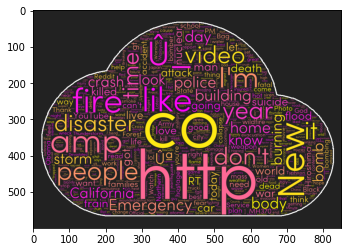

In [0]:
MASK_FILE = r"/content/drive/My Drive/WordCloud/cloud.png"
FONT_FILE = r"/content/drive/My Drive/WordCloud/sofiapro-light.otf"

# We create the mask from our cloud image.
mask = np.array(Image.open(MASK_FILE))

# We prepare our word cloud object and save it to disk.
wc = WordCloud(background_color="#222222",
                          max_words=1000,
                          mask=mask,
                          contour_width=2,
                          colormap="spring",
                          font_path=FONT_FILE,
                          contour_color="white",
                          collocations=False,
                          stopwords=STOP_WORDS)
    
cloud = wc.generate(doc.text)
plt.imshow(cloud)

# Data Viz

In [0]:
df.location.value_counts()

USA                         104
New York                     71
United States                50
London                       45
Canada                       29
                           ... 
Maharashtra                   1
?????? in Yokohama Japan      1
South Florida                 1
Rockville, Maryland           1
Hampstead, London.            1
Name: location, Length: 3341, dtype: int64

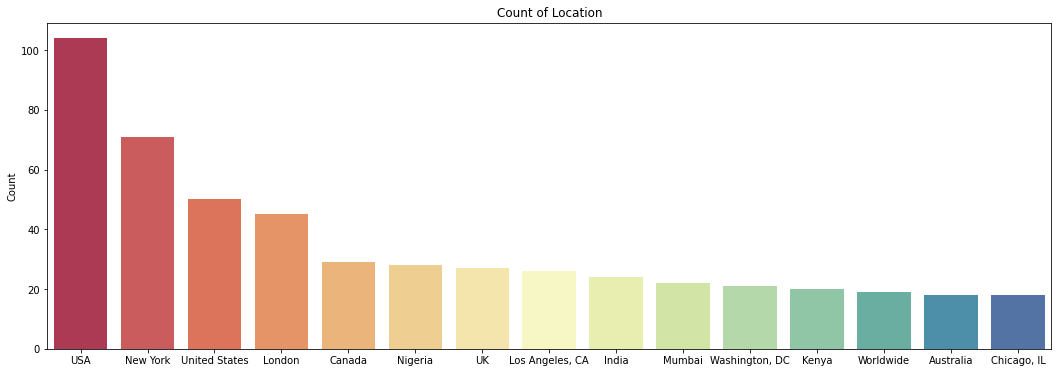

In [0]:
count = df.location.value_counts()[:15]
_, ax = plt.subplots(figsize=(18,6))
sns.set_palette('Spectral', 15)
sns.barplot(count.index, count, ax=ax)
plt.title('Count of Location')
plt.ylabel('Count')
plt.show()

In [0]:
plt.style.use('seaborn-bright')

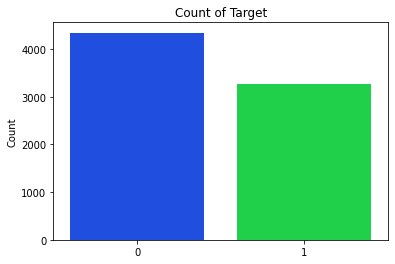

In [0]:
count = df.target.value_counts()
sns.barplot(count.index, count)
plt.title('Count of Target')
plt.ylabel('Count')
plt.show()

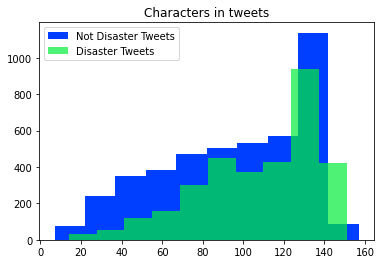

In [0]:
no_disaster_len = df[df['target']==0]['text'].str.len()
plt.hist(no_disaster_len)

disaster_len = df[df['target']==1]['text'].str.len()
plt.hist(disaster_len, alpha=0.7)

plt.legend(['Not Disaster Tweets', 'Disaster Tweets'])
plt.title('Characters in tweets')
plt.show()

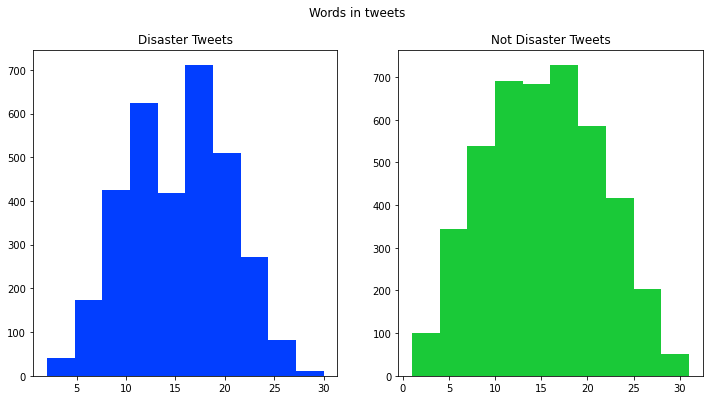

In [0]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

disaster_len = df[df['target']==1]['text'].str.split().str.len()
ax1.hist(disaster_len, color='#023eff')
ax1.set_title('Disaster Tweets')


no_disaster_len = df[df['target']==0]['text'].str.split().str.len()
ax2.hist(no_disaster_len, color='#1ac938')
ax2.set_title('Not Disaster Tweets')

plt.suptitle('Words in tweets')
plt.show()

# Cleanning text

In [0]:
def remove_accented_chars(text):
    text = unidecode.unidecode(text)
    return text

In [0]:
def remove_URL(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'',text)

In [0]:
def strip_html_tags(text):
    soup = BeautifulSoup(text, "html.parser")
    stripped_text = soup.get_text(separator=" ")
    return stripped_text

In [0]:
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [0]:
def remove_punct(text):
    table=str.maketrans('','',string.punctuation)
    return text.translate(table)

In [0]:
def remove_numbers(text):
  numbers = re.compile(r"\d+")
  return numbers.sub(r'', text)

In [0]:
def text_to_lower(text):
  return text.lower()

In [0]:
def remove_whitespace(text):
  return " ".join(text.split())

In [0]:
def cleaning_step(text):
  text = remove_accented_chars(text)
  text = remove_URL(text)
  text = strip_html_tags(text)
  text = remove_emoji(text)
  text = remove_punct(text)
  text = remove_numbers(text)
  text = remove_whitespace(text)
  text = text_to_lower(text)

  return text

In [0]:
df.text = df.text.progress_apply(cleaning_step)

100%|██████████| 7613/7613 [00:00<00:00, 7918.48it/s]


In [0]:
df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,our deeds are the reason of this earthquake ma...,1
1,4,NaN,NaN,forest fire near la ronge sask canada,1
2,5,NaN,NaN,all residents asked to shelter in place are be...,1
3,6,NaN,NaN,people receive wildfires evacuation orders in ...,1
4,7,NaN,NaN,just got sent this photo from ruby alaska as s...,1


# spaCy config

In [0]:
# Loading all cleaned tweets into a corpus
corpus = " ".join(df.text.to_list())

# Loading new corpus into spacy
nlp.max_length = len(corpus)

doc = nlp(corpus)

In [0]:
# Tokenisation of tweet via spaCy
%%time
df["tokens"] = df.text.apply(lambda x: nlp.tokenizer(x))

CPU times: user 947 ms, sys: 12.8 ms, total: 960 ms
Wall time: 961 ms


In [0]:
df.head()

,id,keyword,location,text,target,tokens
0,1,NaN,NaN,our deeds are the reason of this earthquake ma...,1,"(our, deeds, are, the, reason, of, this, earth..."
1,4,NaN,NaN,forest fire near la ronge sask canada,1,"(forest, fire, near, la, ronge, sask, canada)"
2,5,NaN,NaN,all residents asked to shelter in place are be...,1,"(all, residents, asked, to, shelter, in, place..."
3,6,NaN,NaN,people receive wildfires evacuation orders in ...,1,"(people, receive, wildfires, evacuation, order..."
4,7,NaN,NaN,just got sent this photo from ruby alaska as s...,1,"(just, got, sent, this, photo, from, ruby, ala..."


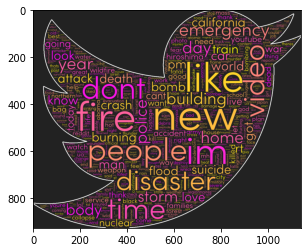

In [0]:
MASK_FILE_2 = r"/content/drive/My Drive/WordCloud/twitter.png"

# We create the mask from our cloud image.
mask_2 = np.array(Image.open(MASK_FILE_2))

# We prepare our word cloud object and save it to disk.
wc = WordCloud(background_color="#222222",
                          max_words=1000,
                          mask=mask_2,
                          contour_width=2,
                          colormap="spring",
                          font_path=FONT_FILE,
                          contour_color="white",
                          collocations=False,
                          stopwords=STOP_WORDS)
    
cloud = wc.generate(doc.text)

_, ax = plt.subplots()
ax.imshow(cloud)
ax.grid(linewidth=0)

# Baseline Model without spacy

In [0]:
# Tensorflow dataset
tf_ds = tf.data.Dataset.from_tensor_slices((df["text"].values, df["target"].values))

In [0]:
test.text = test.text.apply(cleaning_step)

In [0]:
test['lbl'] = 0

In [0]:
test_ds = tf.data.Dataset.from_tensor_slices((test["text"].values, test["lbl"].values))

In [0]:
# Création d'une instance Tokenizer
tokenizer = tfds.features.text.Tokenizer()

# Nous allons tokenizer chacun des mots en elevant les doublons via l'utilisation de set()
vocabulary_set = set()
for text_tensor, _ in tf_ds:
  doc = tokenizer.tokenize(text_tensor.numpy())
 # vocabulary_set.update(some_tokens)
  vocabulary_set.update(doc)

for text_tensor, _ in test_ds:
  doc = tokenizer.tokenize(text_tensor.numpy())
 # vocabulary_set.update(some_tokens)
  vocabulary_set.update(doc) 

vocab_size = len(vocabulary_set)
vocab_size

21602

In [0]:
# Encoding tokens by index
encoder = tfds.features.text.TokenTextEncoder(vocabulary_set)

encoder.vocab_size

21604

In [0]:
# Function to encode tensorflow dataset
def encode(text_tensor, label):
  encoded_text = encoder.encode(text_tensor.numpy())
  return encoded_text, label

def encode_map_fn(text, label):
  return tf.py_function(encode, inp=[text, label], Tout=(tf.int64, tf.int64))

In [0]:
all_encoded_data = tf_ds.map(encode_map_fn)
test_encoded_data = test_ds.map(encode_map_fn)

In [0]:
# Train Test Split
TAKE_SIZE = 1500

train_ds = all_encoded_data.skip(TAKE_SIZE).shuffle(len(df))
train_ds = train_ds.padded_batch(16,  padded_shapes=([-1], []))

val_ds = all_encoded_data.take(TAKE_SIZE).shuffle(len(df))
val_ds = val_ds.padded_batch(16, padded_shapes=([-1], []))

test_ds = test_encoded_data.padded_batch(16, padded_shapes=([-1], []))

In [0]:
model = tf.keras.Sequential([
                  
                  # Couche d'Input Word Embedding           
                  tf.keras.layers.Embedding(encoder.vocab_size, 64),

                  # Couche LSTM Bidirectionnelle
                  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)), # On garde l'aspect séquenciel

                  tf.keras.layers.Conv1D(filters=16, kernel_size=3, activation='relu'),

                  # Couche LSTM Bidirectionnelle
                  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),

                  # Nouvelle couche LSTM
                  tf.keras.layers.LSTM(32, return_sequences=False), # On retourne à des objets séquentiels  

                  # Couche Dense classique 
                  tf.keras.layers.Dense(64, activation='relu'),
                  tf.keras.layers.Dense(32, activation='relu'),
                  tf.keras.layers.Dense(16, activation='relu'),
                  tf.keras.layers.Dense(8, activation='relu'),

                  # Couche de sortie avec sigmoid
                  tf.keras.layers.Dense(1, activation='sigmoid')
])

In [0]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.001),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

In [0]:
# Entrainement du modèle 
history = model.fit(train_ds, epochs=10, validation_data=val_ds)

Epoch 1/10
383/383 [==============================] - 27s 71ms/step - loss: 0.5445 - accuracy: 0.7198 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/10
383/383 [==============================] - 21s 55ms/step - loss: 0.3289 - accuracy: 0.8752 - val_loss: 0.6787 - val_accuracy: 0.6933
Epoch 3/10
383/383 [==============================] - 21s 55ms/step - loss: 0.1974 - accuracy: 0.9360 - val_loss: 0.5642 - val_accuracy: 0.7613
Epoch 4/10
383/383 [==============================] - 21s 56ms/step - loss: 0.1378 - accuracy: 0.9565 - val_loss: 0.6379 - val_accuracy: 0.7460
Epoch 5/10
383/383 [==============================] - 21s 56ms/step - loss: 0.0930 - accuracy: 0.9681 - val_loss: 1.0386 - val_accuracy: 0.7327
Epoch 6/10
383/383 [==============================] - 21s 56ms/step - loss: 0.0781 - accuracy: 0.9742 - val_loss: 1.0868 - val_accuracy: 0.6993
Epoch 7/10
383/383 [==============================] - 21s 55ms/step - loss: 0.0793 - accuracy: 0.9720 - val_loss: 1.1434 - val_a

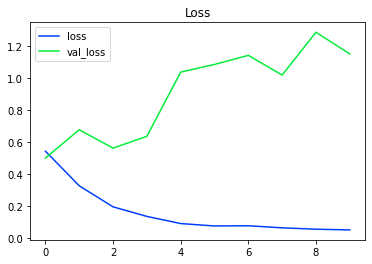

In [0]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.title('Loss')
plt.show()

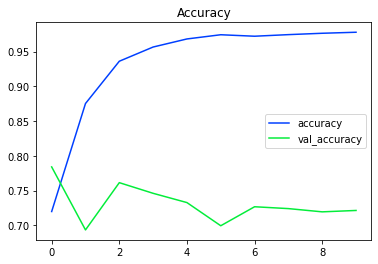

In [0]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['accuracy', 'val_accuracy'])
plt.title('Accuracy')
plt.show()

**Deeper model**

In [0]:
model_deep = tf.keras.Sequential([
                  
                  # Couche d'Input Word Embedding           
                  tf.keras.layers.Embedding(encoder.vocab_size+1, 64),

                  # Couche LSTM Bidirectionnelle
                  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)), # On garde l'aspect séquenciel

                  tf.keras.layers.Dropout(0.4),

                  tf.keras.layers.Conv1D(filters=64, kernel_size=3, activation='relu'),
                  tf.keras.layers.MaxPooling1D(pool_size=3),
                  
                  tf.keras.layers.Dropout(0.4),

                  # Nouvelle couche LSTM
                  tf.keras.layers.LSTM(64, return_sequences=True), # On retourne à des objets séquentiels  

                  # Couche Dense classique 
                  tf.keras.layers.Dense(64, activation='relu', 
                                        kernel_regularizer=tf.keras.regularizers.l2(0.001)),
                  tf.keras.layers.Dropout(0.4),

                  tf.keras.layers.Dense(32, activation='relu',
                                        kernel_regularizer=tf.keras.regularizers.l2(0.001)),
                  tf.keras.layers.Dropout(0.4),

                  tf.keras.layers.Dense(16, activation='relu',
                                        kernel_regularizer=tf.keras.regularizers.l2(0.001)),
                  tf.keras.layers.Dropout(0.4),

                  tf.keras.layers.Dense(8, activation='relu',
                                        kernel_regularizer=tf.keras.regularizers.l2(0.001)),
                  tf.keras.layers.Dropout(0.4),

                  # Couche de sortie avec sigmoid
                  tf.keras.layers.Dense(1, activation='sigmoid')
])

In [0]:
# Utilisation d'un compileur simple avec un optimiseur Adam pour le calcul de nos gradients 
LR = tf.keras.optimizers.schedules.ExponentialDecay(
    0.0001, 2500, 0.96, True
)

model_deep.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=LR),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

In [0]:
# Entrainement du modèle 
history_deep = model_deep.fit(train_ds, epochs=15, validation_data=val_ds)

Epoch 1/15
383/383 [==============================] - 31s 80ms/step - loss: 0.8031 - accuracy: 0.5469 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/15
383/383 [==============================] - 20s 51ms/step - loss: 0.7101 - accuracy: 0.6371 - val_loss: 0.6430 - val_accuracy: 0.7423
Epoch 3/15
383/383 [==============================] - 20s 53ms/step - loss: 0.5728 - accuracy: 0.7912 - val_loss: 0.6021 - val_accuracy: 0.7440
Epoch 4/15
383/383 [==============================] - 20s 52ms/step - loss: 0.4521 - accuracy: 0.8595 - val_loss: 0.6013 - val_accuracy: 0.7438
Epoch 5/15
383/383 [==============================] - 20s 52ms/step - loss: 0.3599 - accuracy: 0.8989 - val_loss: 0.7339 - val_accuracy: 0.6888
Epoch 6/15
383/383 [==============================] - 20s 52ms/step - loss: 0.2906 - accuracy: 0.9205 - val_loss: 0.8025 - val_accuracy: 0.7030
Epoch 7/15
383/383 [==============================] - 20s 52ms/step - loss: 0.2401 - accuracy: 0.9355 - val_loss: 1.0934 - val_a

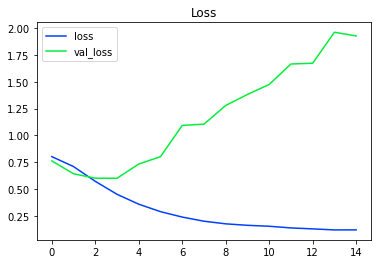

In [0]:
plt.plot(history_deep.history['loss'])
plt.plot(history_deep.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.title('Loss')
plt.show()

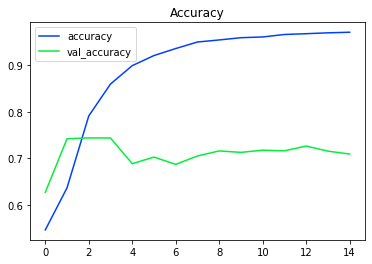

In [0]:
plt.plot(history_deep.history['accuracy'])
plt.plot(history_deep.history['val_accuracy'])
plt.legend(['accuracy', 'val_accuracy'])
plt.title('Accuracy')
plt.show()

# Cleaning corpus with removing STOPWORDS

In [0]:
from spacy.lang.en.stop_words import STOP_WORDS

In [0]:
# Tensorflow dataset
ds_stop = tf.data.Dataset.from_tensor_slices((df["text"].values, df["target"].values))

In [0]:
corpus_stop = "|".join(df["text"].to_list())
len(corpus_stop)

624002

In [0]:
%%time
nlp.max_length = len(corpus_stop)
doc_stop = nlp(corpus_stop)

CPU times: user 14 s, sys: 882 ms, total: 14.9 s
Wall time: 15 s


In [0]:
%%time
tokens_stop = [token.lemma_ for token in doc_stop if token.text not in STOP_WORDS]
vocabulary_set_stop = set(tokens_stop)

CPU times: user 176 ms, sys: 2.54 ms, total: 179 ms
Wall time: 179 ms


In [0]:
vocab_size_stop = len(vocabulary_set_stop)
vocab_size_stop

18553

In [0]:
# Encoding tokens by index
encoder = tfds.features.text.TokenTextEncoder(vocabulary_set_stop)

encoder.vocab_size

18555

In [0]:
all_encoded_data_stop = ds_stop.map(encode_map_fn)

In [0]:
# Train Test Split
TAKE_SIZE = 1500

train_ds_stop = all_encoded_data_stop.skip(TAKE_SIZE).shuffle(len(df))
train_ds_stop = train_ds_stop.padded_batch(16,  padded_shapes=([-1], []))

val_ds_stop = all_encoded_data_stop.take(TAKE_SIZE).shuffle(len(df))
val_ds_stop = val_ds_stop.padded_batch(16, padded_shapes=([-1], []))

In [0]:
model_stop = tf.keras.Sequential([
                  
                  # Couche d'Input Word Embedding           
                  tf.keras.layers.Embedding(encoder.vocab_size, 64),

                  # Couche LSTM Bidirectionnelle
                  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)), # On garde l'aspect séquenciel

                  tf.keras.layers.Conv1D(filters=16, kernel_size=3, activation='relu'),

                  # Couche LSTM Bidirectionnelle
                  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),

                  # Nouvelle couche LSTM
                  tf.keras.layers.LSTM(32, return_sequences=False), # On retourne à des objets séquentiels  

                  # Couche Dense classique 
                  tf.keras.layers.Dense(64, activation='relu'),
                  tf.keras.layers.Dense(32, activation='relu'),
                  tf.keras.layers.Dense(16, activation='relu'),
                  tf.keras.layers.Dense(8, activation='relu'),

                  # Couche de sortie avec sigmoid
                  tf.keras.layers.Dense(1, activation='sigmoid')
])

In [0]:
model_stop.compile(optimizer=tf.keras.optimizers.Adam(0.001),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

In [0]:
# Entrainement du modèle 
history_stop = model_stop.fit(train_ds_stop, epochs=10, validation_data=val_ds_stop)

Epoch 1/10
383/383 [==============================] - 60s 157ms/step - loss: 0.5870 - accuracy: 0.6844 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/10
383/383 [==============================] - 48s 124ms/step - loss: 0.3633 - accuracy: 0.8614 - val_loss: 0.5689 - val_accuracy: 0.7173
Epoch 3/10
383/383 [==============================] - 48s 124ms/step - loss: 0.2479 - accuracy: 0.9126 - val_loss: 0.9009 - val_accuracy: 0.6253
Epoch 4/10
383/383 [==============================] - 48s 124ms/step - loss: 0.1937 - accuracy: 0.9357 - val_loss: 0.7689 - val_accuracy: 0.7093
Epoch 5/10
383/383 [==============================] - 47s 123ms/step - loss: 0.1516 - accuracy: 0.9473 - val_loss: 0.8121 - val_accuracy: 0.7373
Epoch 6/10
383/383 [==============================] - 48s 125ms/step - loss: 0.1224 - accuracy: 0.9558 - val_loss: 0.9071 - val_accuracy: 0.7280
Epoch 7/10
383/383 [==============================] - 48s 125ms/step - loss: 0.1076 - accuracy: 0.9576 - val_loss: 0.9514 

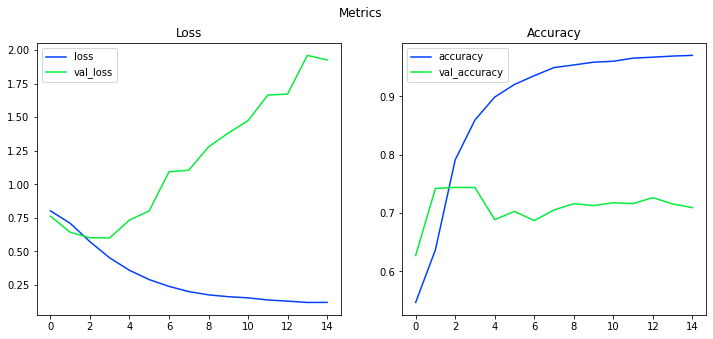

In [0]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

ax1.plot(history_deep.history['loss'])
ax1.plot(history_deep.history['val_loss'])
ax1.legend(['loss', 'val_loss'])
ax1.set_title('Loss')

ax2.plot(history_deep.history['accuracy'])
ax2.plot(history_deep.history['val_accuracy'])
ax2.legend(['accuracy', 'val_accuracy'])
ax2.set_title('Accuracy')

fig.suptitle('Metrics')
plt.show()

# Trying to do better with spaCy

In [0]:
full_df = pd.concat([df, test])

In [0]:
full_df = full_df[['text', 'target']]
full_df.target = full_df.target.fillna(0)
full_df.target = full_df.target.astype('int')
full_df.head()

,text,target
0,our deeds are the reason of this earthquake ma...,1
1,forest fire near la ronge sask canada,1
2,all residents asked to shelter in place are be...,1
3,people receive wildfires evacuation orders in ...,1
4,just got sent this photo from ruby alaska as s...,1


In [0]:
full_df.target.dtype

dtype('int64')

In [0]:
full_df['tokens'] = full_df.text.apply(lambda x: nlp.tokenizer(x))
full_df.head()

,text,target,tokens
0,our deeds are the reason of this earthquake ma...,1,"(our, deeds, are, the, reason, of, this, earth..."
1,forest fire near la ronge sask canada,1,"(forest, fire, near, la, ronge, sask, canada)"
2,all residents asked to shelter in place are be...,1,"(all, residents, asked, to, shelter, in, place..."
3,people receive wildfires evacuation orders in ...,1,"(people, receive, wildfires, evacuation, order..."
4,just got sent this photo from ruby alaska as s...,1,"(just, got, sent, this, photo, from, ruby, ala..."


In [0]:
corpus_spacy = " ".join(full_df.text.values)

nlp.max_length = len(corpus_spacy)

doc_spacy = nlp(corpus_spacy)

In [0]:
# Création d'un set() qui va prendre tous les tokens unique de notre corpus de texte
tokens_spacy = [token.text for token in doc_spacy]
voc_set_spacy= set(tokens_spacy)
voc_size_spacy = len(voc_set_spacy)
print(voc_size_spacy)

28314


In [0]:
# Création d'un id pour chacun dcount = lambda l1,l2: sum([1 for x in l1 if x in l2])es tokens
all_tokens = {}
for i,token in enumerate(voc_set_spacy):
  all_tokens[token] = i+1

In [0]:
# Création de fonction qui vont créer un vecteur d'indices pour chacune des séquences de tokens
def tokens_to_index(tokens):
  indices = []
  for token in tokens:
    indices.append(all_tokens[token.text])
  
  return indices

In [0]:
full_df["indices"] = full_df["tokens"].apply(lambda x: tokens_to_index(x))

In [0]:
full_df.head()

,text,target,tokens,indices
0,our deeds are the reason of this earthquake ma...,1,"(our, deeds, are, the, reason, of, this, earth...","[24552, 17393, 1657, 25437, 11550, 28137, 4355..."
1,forest fire near la ronge sask canada,1,"(forest, fire, near, la, ronge, sask, canada)","[12788, 17964, 8653, 18324, 4856, 16020, 14642]"
2,all residents asked to shelter in place are be...,1,"(all, residents, asked, to, shelter, in, place...","[9731, 9125, 16240, 26753, 8990, 5761, 19014, ..."
3,people receive wildfires evacuation orders in ...,1,"(people, receive, wildfires, evacuation, order...","[11131, 17682, 12642, 25826, 12229, 5761, 27555]"
4,just got sent this photo from ruby alaska as s...,1,"(just, got, sent, this, photo, from, ruby, ala...","[2521, 27366, 14579, 4355, 5783, 20457, 10429,..."


In [0]:
num_words=len(all_tokens)+1
embedding_matrix=np.zeros((num_words, 300))

for word,i in tqdm(all_tokens.items()):
    if i > num_words:
        continue
    
    emb_vec = nlp(word).vector
    if emb_vec is not None:
        embedding_matrix[i]=emb_vec

100%|██████████| 28314/28314 [03:53<00:00, 121.51it/s]


In [0]:
# Création d'une fonction qui va compter la longueur maximum d'une phrase
def max_len(lines):
  return max(len(line) for line in lines)

In [0]:
max_lenght_tkn = max_len(full_df['indices'].to_list())
max_lenght_tkn

55

In [0]:
# Utilisation de Keras pour créer des séquences de tokens de la même longueur
%%time
padded_tkn_indices = tf.keras.preprocessing.sequence.pad_sequences(full_df["indices"], maxlen=max_lenght_tkn, padding="post", truncating="post")

CPU times: user 58.3 ms, sys: 1.13 ms, total: 59.4 ms
Wall time: 62.3 ms


In [0]:
padded_tkn_indices.shape

(10876, 55)

In [0]:
train_data_tkn = padded_tkn_indices[:df.shape[0]]
test_data_tkn = padded_tkn_indices[df.shape[0]:]

In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train_data_tkn, df['target'].values, test_size=0.15)
print('Shape of train',X_train.shape)
print("Shape of Validation ",X_test.shape)

Shape of train (6471, 55)
Shape of Validation  (1142, 55)


In [0]:
model_tkn = tf.keras.Sequential([
                  
                  # Couche d'Input Word Embedding           
                  tf.keras.layers.Embedding(voc_size_spacy+1, 300,
                                            input_length=max_lenght_tkn,
                                            embeddings_initializer=tf.keras.initializers.Constant(embedding_matrix),
                                            trainable=False),
                                 
                  tf.keras.layers.SpatialDropout1D(0.2),

                  # Couche LSTM Bidirectionnelle
                  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)), # On garde l'aspect séquenciel

                  tf.keras.layers.Conv1D(filters=64, kernel_size=3, activation='relu'),
                  tf.keras.layers.MaxPooling1D(pool_size=3),

                  # Nouvelle couche LSTM
                  tf.keras.layers.LSTM(64, dropout=0.2, recurrent_dropout=0.2, return_sequences=False), # On retourne à des objets séquentiels  

                  # Couche Dense classique 
                  tf.keras.layers.Dense(64, activation='relu',
                                        kernel_regularizer=tf.keras.regularizers.l2(0.001)),
                  tf.keras.layers.Dropout(0.5),

                  tf.keras.layers.Dense(32, activation='relu',
                                        kernel_regularizer=tf.keras.regularizers.l2(0.001)),
                  tf.keras.layers.Dropout(0.5),
                  
                  tf.keras.layers.Dense(16, activation='relu',
                                        kernel_regularizer=tf.keras.regularizers.l2(0.001)),
                                   
                  tf.keras.layers.Dropout(0.5),                 
                  tf.keras.layers.Dense(8, activation='relu',
                                        kernel_regularizer=tf.keras.regularizers.l2(0.001)),
                  tf.keras.layers.Dropout(0.5),
                  
                  # Couche de sortie avec sigmoid
                  tf.keras.layers.Dense(1, activation='sigmoid')
])

In [0]:
model_tkn.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 33, 300)           6465600   
_________________________________________________________________
spatial_dropout1d_2 (Spatial (None, 33, 300)           0         
_________________________________________________________________
bidirectional_9 (Bidirection (None, 33, 128)           186880    
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 31, 64)            24640     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 10, 64)            0         
_________________________________________________________________
lstm_16 (LSTM)               (None, 64)                33024     
_________________________________________________________________
dense_26 (Dense)             (None, 64)               

In [0]:
# Utilisation d'un compileur simple avec un optimiseur Adam pour le calcul de nos gradients 
LR = tf.keras.optimizers.schedules.ExponentialDecay(
    0.0001, 2000, 0.96, True
)


model_tkn.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=LR),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['binary_accuracy'])

In [0]:
history_tkn = model_tkn.fit(X_train, y_train, 
                        batch_size=16,
                        epochs=30,
                        validation_data=(X_test, y_test))

Train on 6471 samples, validate on 1142 samples
Epoch 1/30
6471/6471 [==============================] - 25s 4ms/sample - loss: 0.8049 - binary_accuracy: 0.5662 - val_loss: 0.7613 - val_binary_accuracy: 0.5665
Epoch 2/30
6471/6471 [==============================] - 17s 3ms/sample - loss: 0.7440 - binary_accuracy: 0.5968 - val_loss: 0.7006 - val_binary_accuracy: 0.7741
Epoch 3/30
6471/6471 [==============================] - 17s 3ms/sample - loss: 0.7154 - binary_accuracy: 0.7243 - val_loss: 0.6860 - val_binary_accuracy: 0.7793
Epoch 4/30
6471/6471 [==============================] - 18s 3ms/sample - loss: 0.6998 - binary_accuracy: 0.7546 - val_loss: 0.6830 - val_binary_accuracy: 0.7732
Epoch 5/30
6471/6471 [==============================] - 17s 3ms/sample - loss: 0.6862 - binary_accuracy: 0.7592 - val_loss: 0.6559 - val_binary_accuracy: 0.7837
Epoch 6/30
6471/6471 [==============================] - 17s 3ms/sample - loss: 0.6648 - binary_accuracy: 0.7637 - val_loss: 0.6356 - val_binary_acc

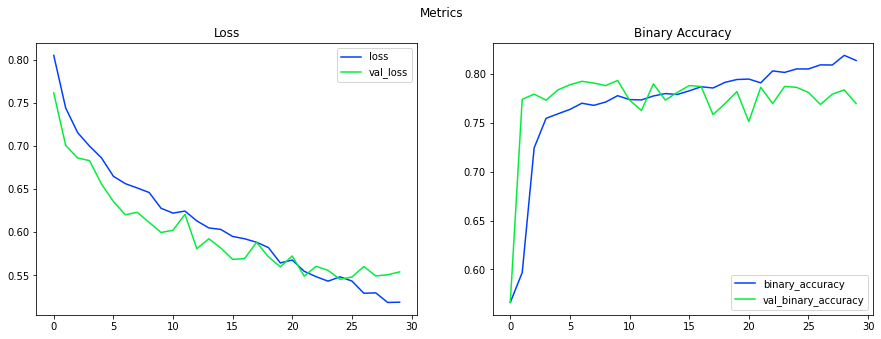

In [0]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

ax1.plot(history_tkn.history['loss'])
ax1.plot(history_tkn.history['val_loss'])
ax1.legend(['loss', 'val_loss'])
ax1.set_title('Loss')

ax2.plot(history_tkn.history['binary_accuracy'])
ax2.plot(history_tkn.history['val_binary_accuracy'])
ax2.legend(['binary_accuracy', 'val_binary_accuracy'])
ax2.set_title('Binary Accuracy')

fig.suptitle('Metrics')
plt.show()

**Lemmatization**

In [0]:
def lemmatizer(tokens):
  lemma = []
  doc = nlp(tokens)
  for token in doc:
    lemma.append(token.lemma_)

  return lemma

In [0]:
full_df["lemma"] = full_df["text"].apply(lambda x: lemmatizer(x))

In [0]:
full_df.head()

,text,target,tokens,indices,lemma
0,our deeds are the reason of this earthquake ma...,1,"(our, deeds, are, the, reason, of, this, earth...","[21316, 9013, 20211, 7949, 16472, 6421, 5436, ...","[-PRON-, deed, be, the, reason, of, this, eart..."
1,forest fire near la ronge sask canada,1,"(forest, fire, near, la, ronge, sask, canada)","[11224, 11532, 4575, 1876, 5772, 3078, 21505]","[forest, fire, near, la, ronge, sask, canada]"
2,all residents asked to shelter in place are be...,1,"(all, residents, asked, to, shelter, in, place...","[7611, 8511, 19435, 15551, 924, 18477, 8480, 2...","[all, resident, ask, to, shelter, in, place, b..."
3,people receive wildfires evacuation orders in ...,1,"(people, receive, wildfires, evacuation, order...","[7190, 16036, 12608, 7217, 17845, 18477, 11222]","[people, receive, wildfire, evacuation, order,..."
4,just got sent this photo from ruby alaska as s...,1,"(just, got, sent, this, photo, from, ruby, ala...","[1501, 5699, 1559, 5436, 7392, 4826, 8391, 750...","[just, get, send, this, photo, from, ruby, ala..."


In [0]:
# Création d'un set() qui va prendre tous les tokens unique de notre corpus de texte
tokens_lemma = [token.lemma_ for sublist in full_df.text for token in nlp(sublist) ]
voc_set_lemma= set(tokens_lemma)
voc_size_lemma = len(voc_set_lemma)
print(voc_size_lemma)

19089


In [0]:
print(tokens_lemma)

['-PRON-', 'deed', 'be', 'the', 'reason', 'of', 'this', 'earthquake', 'may', 'allah', 'forgive', '-PRON-', 'all', 'forest', 'fire', 'near', 'la', 'ronge', 'sask', 'canada', 'all', 'resident', 'ask', 'to', 'shelter', 'in', 'place', 'be', 'be', 'notify', 'by', 'officer', 'no', 'other', 'evacuation', 'or', 'shelter', 'in', 'place', 'order', 'be', 'expect', 'people', 'receive', 'wildfire', 'evacuation', 'order', 'in', 'california', 'just', 'get', 'send', 'this', 'photo', 'from', 'ruby', 'alaska', 'as', 'smoke', 'from', 'wildfire', 'pour', 'into', 'a', 'school', 'rockyfire', 'update', 'california', 'hwy', 'close', 'in', 'both', 'direction', 'due', 'to', 'lake', 'county', 'fire', 'cafire', 'wildfire', 'flood', 'disaster', 'heavy', 'rain', 'cause', 'flash', 'flooding', 'of', 'street', 'in', 'manitou', 'colorado', 'springs', 'area', '-PRON-', 'be', 'on', 'top', 'of', 'the', 'hill', 'and', 'i', 'can', 'see', 'a', 'fire', 'in', 'the', 'wood', 'there', 's', 'an', 'emergency', 'evacuation', 'happe

In [0]:
# Création d'un id pour chacun des tokens
all_lemma = {}
for i,lemma in enumerate(voc_set_lemma):
  all_lemma[lemma] = i+1

In [0]:
# Création de fonction qui vont créer un vecteur d'indices pour chacune des séquences de tokens
def lemma_to_index(lemma):
  indices = []
  for token in lemma:
    indices.append(all_lemma[token])

  return indices

In [0]:
full_df["lemma_indices"] = full_df["lemma"].apply(lambda x: lemma_to_index(x))

In [0]:
full_df.head()

,text,target,tokens,indices,lemma,lemma_indices
0,our deeds are the reason of this earthquake ma...,1,"(our, deeds, are, the, reason, of, this, earth...","[21316, 9013, 20211, 7949, 16472, 6421, 5436, ...","[-PRON-, deed, be, the, reason, of, this, eart...","[4289, 2301, 13884, 7070, 14598, 5694, 4796, 7..."
1,forest fire near la ronge sask canada,1,"(forest, fire, near, la, ronge, sask, canada)","[11224, 11532, 4575, 1876, 5772, 3078, 21505]","[forest, fire, near, la, ronge, sask, canada]","[9953, 10237, 4048, 1645, 5102, 2722, 19048]"
2,all residents asked to shelter in place are be...,1,"(all, residents, asked, to, shelter, in, place...","[7611, 8511, 19435, 15551, 924, 18477, 8480, 2...","[all, resident, ask, to, shelter, in, place, b...","[6768, 2302, 17032, 13779, 815, 16390, 7541, 1..."
3,people receive wildfires evacuation orders in ...,1,"(people, receive, wildfires, evacuation, order...","[7190, 16036, 12608, 7217, 17845, 18477, 11222]","[people, receive, wildfire, evacuation, order,...","[6393, 14203, 1354, 6416, 8247, 16390, 9951]"
4,just got sent this photo from ruby alaska as s...,1,"(just, got, sent, this, photo, from, ruby, ala...","[1501, 5699, 1559, 5436, 7392, 4826, 8391, 750...","[just, get, send, this, photo, from, ruby, ala...","[1307, 14970, 11173, 4796, 6572, 4257, 7464, 6..."


In [0]:
max_lenght = max_len(full_df['lemma_indices'].to_list())
max_lenght

33

In [0]:
# Utilisation de Keras pour créer des séquences de tokens de la même longueur
%%time
padded_lemma_indices = tf.keras.preprocessing.sequence.pad_sequences(full_df["lemma_indices"], maxlen=max_lenght, padding="post")

CPU times: user 59.9 ms, sys: 0 ns, total: 59.9 ms
Wall time: 66.4 ms


In [0]:
padded_lemma_indices.shape

(10876, 33)

In [0]:
full_dtf = tf.data.Dataset.from_tensor_slices((padded_lemma_indices, full_df.target.values))

In [0]:
TAKE_SIZE = 1500
BATCH_SIZE = 64

train_data = full_dtf.skip(TAKE_SIZE).take(df.shape[0] - TAKE_SIZE).shuffle(len(full_df)).batch(BATCH_SIZE)
val_data = full_dtf.take(TAKE_SIZE).shuffle(len(full_df)).batch(BATCH_SIZE)

test_data = full_dtf.skip(df.shape[0]).batch(BATCH_SIZE)

In [0]:
lemma_model = tf.keras.Sequential([
                  
                  # Couche d'Input Word Embedding           
                  tf.keras.layers.Embedding(voc_size_lemma+1, 64, mask_zero=True),

                  # Couche LSTM Bidirectionnelle
                  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)), # On garde l'aspect séquenciel

                  tf.keras.layers.Conv1D(filters=64, kernel_size=3, activation='relu'),
                  tf.keras.layers.MaxPooling1D(pool_size=3),

                  # Nouvelle couche LSTM
                  tf.keras.layers.LSTM(64, return_sequences=True), # On retourne à des objets séquentiels  

                  # Couche Dense classique 
                  tf.keras.layers.Dense(64, activation='relu',
                                        kernel_regularizer=tf.keras.regularizers.l2(0.001)),
                  tf.keras.layers.Dropout(0.5),

                  tf.keras.layers.Dense(32, activation='relu',
                                        kernel_regularizer=tf.keras.regularizers.l2(0.001)),
                  tf.keras.layers.Dropout(0.5),
                  
                  tf.keras.layers.Dense(16, activation='relu',
                                        kernel_regularizer=tf.keras.regularizers.l2(0.001)),
                                   
                  tf.keras.layers.Dropout(0.5),                 
                  tf.keras.layers.Dense(8, activation='relu',
                                        kernel_regularizer=tf.keras.regularizers.l2(0.001)),
                  tf.keras.layers.Dropout(0.5),
                  
                  # Couche de sortie avec sigmoid
                  tf.keras.layers.Dense(1, activation='sigmoid')
])

lemma_model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_10 (Embedding)     (None, None, 64)          1221760   
_________________________________________________________________
bidirectional_13 (Bidirectio (None, None, 128)         66048     
_________________________________________________________________
conv1d_10 (Conv1D)           (None, None, 64)          24640     
_________________________________________________________________
max_pooling1d_8 (MaxPooling1 (None, None, 64)          0         
_________________________________________________________________
lstm_24 (LSTM)               (None, None, 64)          33024     
_________________________________________________________________
dense_50 (Dense)             (None, None, 64)          4160      
_________________________________________________________________
dropout_19 (Dropout)         (None, None, 64)        

In [0]:
# Utilisation d'un compileur simple avec un optimiseur Adam pour le calcul de nos gradients 
LR = tf.keras.optimizers.schedules.ExponentialDecay(
    0.0001, 2000, 0.90, True
)


In [0]:
lemma_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=LR),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

In [0]:
# Entrainement du modèle 
lemma_history = lemma_model.fit(train_data, epochs=10, validation_data=val_data)

Epoch 1/10
96/96 [==============================] - 12s 130ms/step - loss: 0.8217 - accuracy: 0.5541 - val_loss: 0.8115 - val_accuracy: 0.6273
Epoch 2/10
96/96 [==============================] - 10s 101ms/step - loss: 0.8005 - accuracy: 0.6194 - val_loss: 0.7846 - val_accuracy: 0.6989
Epoch 3/10
96/96 [==============================] - 10s 102ms/step - loss: 0.7334 - accuracy: 0.7349 - val_loss: 0.7307 - val_accuracy: 0.7495
Epoch 4/10
96/96 [==============================] - 10s 103ms/step - loss: 0.6656 - accuracy: 0.7967 - val_loss: 0.7147 - val_accuracy: 0.7455
Epoch 5/10
96/96 [==============================] - 10s 100ms/step - loss: 0.6116 - accuracy: 0.8289 - val_loss: 0.7323 - val_accuracy: 0.7560
Epoch 6/10
96/96 [==============================] - 10s 102ms/step - loss: 0.5663 - accuracy: 0.8474 - val_loss: 0.7555 - val_accuracy: 0.7571
Epoch 7/10
96/96 [==============================] - 11s 114ms/step - loss: 0.5264 - accuracy: 0.8582 - val_loss: 0.8165 - val_accuracy: 0.7608

# Best Model Statistics

In [0]:
best_df = pd.read_csv('/content/drive/My Drive/Real_or_Not_Tweeter/train.csv')
best_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [0]:
best_ds = tf.data.Dataset.from_tensor_slices((best_df["text"].values, best_df["target"].values))

In [0]:
# Shuffle le dataset 
best_ds = best_ds.shuffle(len(best_df))

### Tokenize
# Création d'une instance Tokenizer
best_tokenizer = tfds.features.text.Tokenizer()

# Nous allons tokenizer chacun des mots en elevant les doublons via l'utilisation de set()
best_voc_set = set()
for text_tensor, _ in best_ds:
  doc = best_tokenizer.tokenize(text_tensor.numpy())
  best_voc_set.update(doc)

best_voc_size = len(best_voc_set)
best_voc_size

25863

In [0]:
# Création d'un nombre pour chacun des tokens que nous avons créés au dessus
best_encoder = tfds.features.text.TokenTextEncoder(best_voc_set)

best_encoder.vocab_size

25865

In [0]:
# Encodons maintenant tous les éléments d'un dataset
def best_encode(text_tensor, label):
  encoded_text = best_encoder.encode(text_tensor.numpy())
  return encoded_text, label

# Utilisation du fonction py_function pour encoder tout le dataset 
def best_encode_map_fn(text, label):
  return tf.py_function(best_encode, inp=[text, label], Tout=(tf.int64, tf.int64))

In [0]:
best_encode_data = best_ds.map(best_encode_map_fn)

In [0]:
# Train Test Split
TAKE_SIZE = 2500

best_train = best_encode_data.skip(TAKE_SIZE).shuffle(50000)
best_train = best_train.padded_batch(16,  padded_shapes=([-1], []))

best_test = best_encode_data.take(TAKE_SIZE)
best_test = best_test.padded_batch(16, padded_shapes=([-1], []))

In [0]:
best_model = tf.keras.Sequential([
                  # Couche d'Input Word Embedding           
                  tf.keras.layers.Embedding(best_encoder.vocab_size, 64),

                  # Couche LSTM Bidirectionnelle
                  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),

                  # Couche CNN
                  tf.keras.layers.Conv1D(16, 3, activation="relu"),
                  
                  # Nouvelle couche LSTM
                  tf.keras.layers.LSTM(32, return_sequences=False),               

                  # Couche Dense classique 
                  tf.keras.layers.Dense(64, activation='relu'),
                  tf.keras.layers.Dense(32, activation='relu'),
                  tf.keras.layers.Dense(16, activation='relu'),
                  tf.keras.layers.Dense(8, activation='relu'),

                  # Couche de sortie avec le nombre de neurones en sortie égale au nombre de classe avec fonction softmax
                  tf.keras.layers.Dense(1, activation="sigmoid")        
])

best_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 64)          1655360   
_________________________________________________________________
bidirectional (Bidirectional (None, None, 128)         66048     
_________________________________________________________________
conv1d (Conv1D)              (None, None, 16)          6160      
_________________________________________________________________
lstm_1 (LSTM)                (None, 32)                6272      
_________________________________________________________________
dense (Dense)                (None, 64)                2112      
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 16)                5

In [0]:
METRICS = [
      tf.keras.metrics.TruePositives(name='tp'),
      tf.keras.metrics.FalsePositives(name='fp'),
      tf.keras.metrics.TrueNegatives(name='tn'),
      tf.keras.metrics.FalseNegatives(name='fn'), 
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall'),
      tf.keras.metrics.AUC(name='auc'),
]

In [0]:
# Utilisation d'un compileur simple avec un optimiseur Adam pour le calcul de nos gradients 
LR = tf.keras.optimizers.schedules.ExponentialDecay(
    0.0001, 1000, 0.96, True
)


best_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=LR),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=METRICS)

In [0]:
best_history = best_model.fit(best_train, 
                        epochs=30,
                        validation_data=best_test)

Epoch 1/30
320/320 [==============================] - 10s 33ms/step - loss: 0.6922 - tp: 121.0000 - fp: 157.0000 - tn: 2760.0000 - fn: 2075.0000 - accuracy: 0.5635 - precision: 0.4353 - recall: 0.0551 - auc: 0.4913 - val_loss: 0.6911 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 1420.0000 - val_fn: 1080.0000 - val_accuracy: 0.5680 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.6243
Epoch 2/30
320/320 [==============================] - 9s 28ms/step - loss: 0.6217 - tp: 829.0000 - fp: 235.0000 - tn: 2692.0000 - fn: 1357.0000 - accuracy: 0.6886 - precision: 0.7791 - recall: 0.3792 - auc: 0.7223 - val_loss: 0.4552 - val_tp: 745.0000 - val_fp: 117.0000 - val_tn: 1292.0000 - val_fn: 346.0000 - val_accuracy: 0.8148 - val_precision: 0.8643 - val_recall: 0.6829 - val_auc: 0.8724
Epoch 3/30
320/320 [==============================] - 9s 29ms/step - loss: 0.4125 - tp: 1501.0000 - fp: 218.0000 - tn: 2716.0000 - fn: 678.0000 - accuracy: 0.8248 - precision: 0.8732 - recall: 0

In [0]:
f1 = 2 * (np.array(best_history.history['precision']) *  np.array(best_history.history['recall'])) / (np.array(best_history.history['precision']) + np.array(best_history.history['recall']))

In [0]:
val_f1 = 2 * (np.array(best_history.history['val_precision']) *  np.array(best_history.history['val_recall'])) / (np.array(best_history.history['val_precision']) + np.array(best_history.history['val_recall']))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


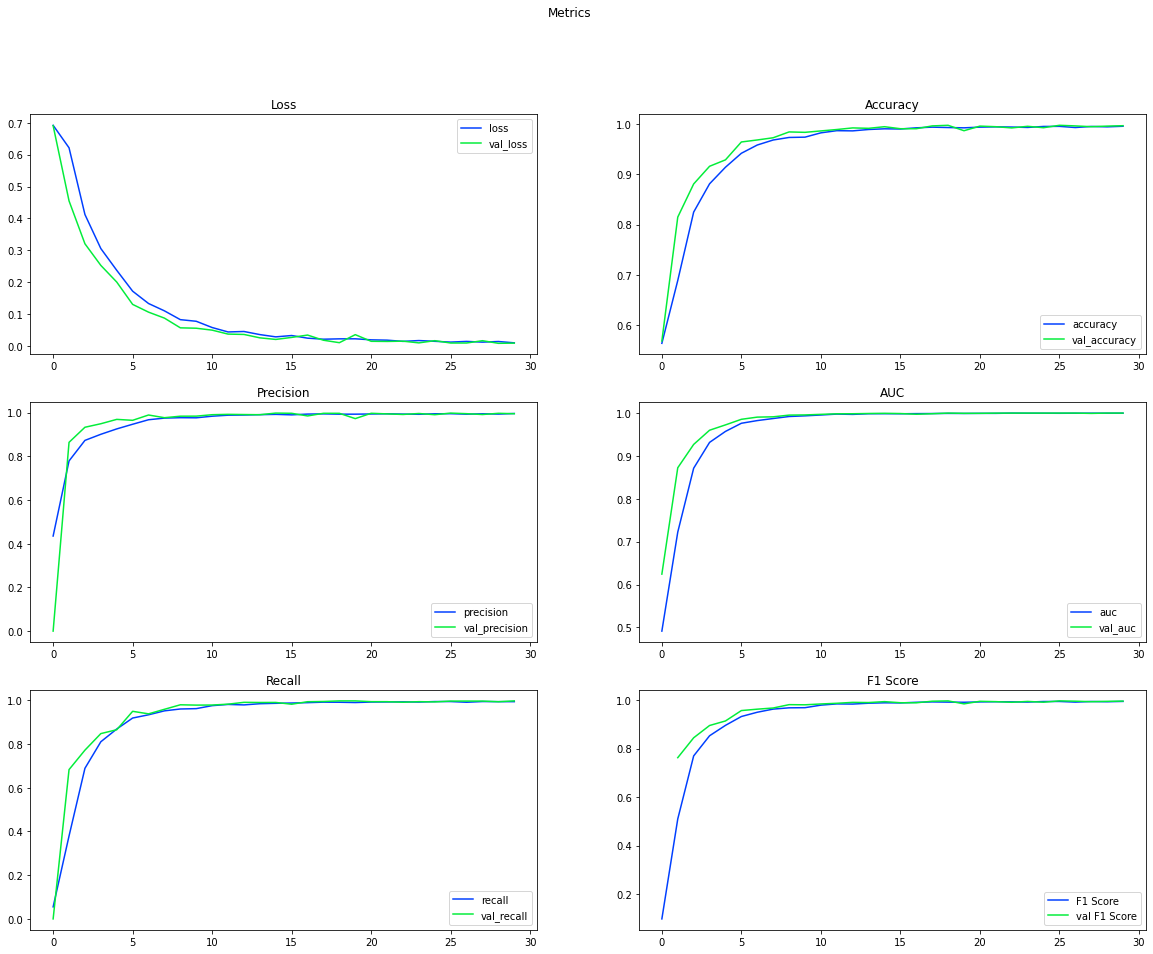

In [0]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize=(20, 15))

ax1.plot(best_history.history['loss'])
ax1.plot(best_history.history['val_loss'])
ax1.legend(['loss', 'val_loss'])
ax1.set_title('Loss')

ax2.plot(best_history.history['accuracy'])
ax2.plot(best_history.history['val_accuracy'])
ax2.legend(['accuracy', 'val_accuracy'])
ax2.set_title('Accuracy')

ax3.plot(best_history.history['precision'])
ax3.plot(best_history.history['val_precision'])
ax3.legend(['precision', 'val_precision'])
ax3.set_title('Precision')

ax4.plot(best_history.history['auc'])
ax4.plot(best_history.history['val_auc'])
ax4.legend(['auc', 'val_auc'])
ax4.set_title('AUC')

ax5.plot(best_history.history['recall'])
ax5.plot(best_history.history['val_recall'])
ax5.legend(['recall', 'val_recall'])
ax5.set_title('Recall')


ax6.plot(f1)
ax6.plot(val_f1)
ax6.legend(['F1 Score', 'val F1 Score'])
ax6.set_title('F1 Score')

fig.suptitle('Metrics')
plt.show()

In [0]:
def plot_cm(tn, fp, fn, tp):
  plt.figure(figsize=(5,5))
  sns.heatmap(np.array([[tn, fp], [fn, tp]]), annot=True, fmt="d")
  plt.title('Confusion matrix')
  plt.ylabel('Actual label')
  plt.xlabel('Predicted label')

  print('Non Disaster Tweet Detected (True Negatives): ', tn)
  print('Disaster Tweet Incorrectly Detected (False Positives): ', fp)
  print('Disaster Tweet Missed (False Negatives): ', fn)
  print('Disaster Tweet Detected (True Positives): ', tp)
  print('Total Disaster Tweet: ', (fp + tp))


157/157 [==============================] - 2s 11ms/step - loss: 0.0134 - tp: 1091.0000 - fp: 6.0000 - tn: 1397.0000 - fn: 6.0000 - accuracy: 0.9952 - precision: 0.9945 - recall: 0.9945 - auc: 0.9995
loss :  0.01341062132269144
tp :  1091.0
fp :  6.0
tn :  1397.0
fn :  6.0
accuracy :  0.995199978351593
precision :  0.9945305585861206
recall :  0.9945305585861206
auc :  0.999459445476532

Non Disaster Tweet Detected (True Negatives):  1397
Disaster Tweet Incorrectly Detected (False Positives):  6
Disaster Tweet Missed (False Negatives):  6
Disaster Tweet Detected (True Positives):  1091
Total Disaster Tweet:  1097


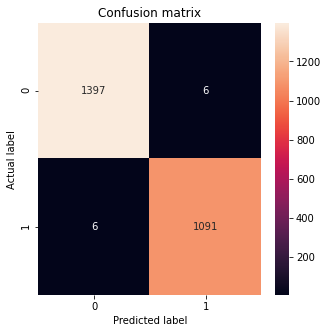

In [0]:
results = best_model.evaluate(best_test)

for name, value in zip(best_model.metrics_names, results):
  print(name, ': ', value)
print()

plot_cm(int(results[3]), int(results[2]), int(results[4]), int(results[1]))

320/320 [==============================] - 2s 6ms/step - loss: 0.0112 - tp: 2211.0000 - fp: 9.0000 - tn: 2883.0000 - fn: 10.0000 - accuracy: 0.9963 - precision: 0.9959 - recall: 0.9955 - auc: 0.9997
loss :  0.011203935369849205
tp :  2211.0
fp :  9.0
tn :  2883.0
fn :  10.0
accuracy :  0.996284008026123
precision :  0.995945930480957
recall :  0.9954975247383118
auc :  0.9997137188911438

Non Disaster Tweet Detected (True Negatives):  2883
Disaster Tweet Incorrectly Detected (False Positives):  9
Disaster Tweet Missed (False Negatives):  10
Disaster Tweet Detected (True Positives):  2211
Total Disaster Tweet:  2220


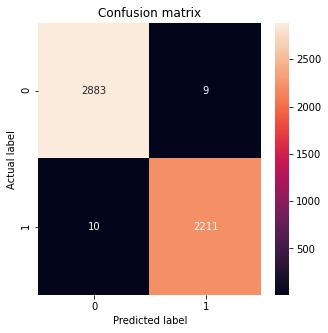

In [0]:
results = best_model.evaluate(best_train)

for name, value in zip(best_model.metrics_names, results):
  print(name, ': ', value)
print()

plot_cm(int(results[3]), int(results[2]), int(results[4]), int(results[1]))

# Predictions

In [31]:
train_df = pd.read_csv('/content/drive/My Drive/Real_or_Not_Tweeter/train.csv')
train_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [32]:
test_df = pd.read_csv('/content/drive/My Drive/Real_or_Not_Tweeter/test.csv')
test_df['target'] = 0
test_df.head()

,id,keyword,location,text,target
0,0,NaN,NaN,Just happened a terrible car crash,0
1,2,NaN,NaN,"Heard about #earthquake is different cities, s...",0
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are...",0
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires,0
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan,0


In [0]:
train_df.text = train_df.text.apply(cleaning_step)

test_df.text = test_df.text.apply(cleaning_step)

In [0]:
from spellchecker import SpellChecker

spell = SpellChecker()
def correct_spellings(text):
    corrected_text = []
    misspelled_words = spell.unknown(text.split())
    for word in text.split():
        if word in misspelled_words:
            corrected_text.append(spell.correction(word))
        else:
            corrected_text.append(word)
    return " ".join(corrected_text)

In [30]:
# train_df.text = train_df.text.apply(correct_spellings)

# test_df.text = test_df.text.apply(correct_spellings)

KeyboardInterrupt: ignored

In [0]:
train_ds_p = tf.data.Dataset.from_tensor_slices((train_df["text"].values, train_df["target"].values))
test_ds_p = tf.data.Dataset.from_tensor_slices((test_df["text"].values, test_df["target"].values))

In [35]:
### Tokenize
# Création d'une instance Tokenizer
pred_tkn = tfds.features.text.Tokenizer()

# Nous allons tokenizer chacun des mots en elevant les doublons via l'utilisation de set()
pred_voc_set = set()
for text_tensor, _ in train_ds_p:
  doc = pred_tkn.tokenize(text_tensor.numpy())
  pred_voc_set.update(doc)

for text_tensor, _ in test_ds_p:
  doc = pred_tkn.tokenize(text_tensor.numpy())
  pred_voc_set.update(doc)


pred_voc_size = len(pred_voc_set)
pred_voc_size

21602

In [36]:
# Création d'un nombre pour chacun des tokens que nous avons créés au dessus
pred_encoder = tfds.features.text.TokenTextEncoder(pred_voc_set)

pred_encoder.vocab_size

21604

In [0]:
# Encodons maintenant tous les éléments d'un dataset
def pred_encode(text_tensor, label):
  encoded_text = pred_encoder.encode(text_tensor.numpy())
  return encoded_text, label

# Utilisation du fonction py_function pour encoder tout le dataset 
def pred_encode_map_fn(text, label):
  return tf.py_function(pred_encode, inp=[text, label], Tout=(tf.int64, tf.int64))

pred_encode_data = train_ds_p.map(pred_encode_map_fn)
pred_encode_data_test = test_ds_p.map(pred_encode_map_fn)

In [0]:
# Train Test Split
TAKE_SIZE = 2000

train_pred = pred_encode_data.skip(TAKE_SIZE).shuffle(50000)
train_pred = train_pred.padded_batch(16,  padded_shapes=([-1], []))

val_pred = best_encode_data.take(TAKE_SIZE)
val_pred = val_pred.padded_batch(16, padded_shapes=([-1], []))

In [39]:
pred_model = tf.keras.Sequential([
                  # Couche d'Input Word Embedding           
                  tf.keras.layers.Embedding(pred_encoder.vocab_size, 64),

                  # Couche LSTM Bidirectionnelle
                  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),

                  # Couche CNN
                  tf.keras.layers.Conv1D(16, 3, activation="relu"),
                  
                  # Nouvelle couche LSTM
                  tf.keras.layers.LSTM(32, return_sequences=False),               

                  # Couche Dense classique 
                  tf.keras.layers.Dense(64, activation='relu'),
                  tf.keras.layers.Dense(32, activation='relu'),
                  tf.keras.layers.Dense(16, activation='relu'),
                  tf.keras.layers.Dense(8, activation='relu'),

                  # Couche de sortie avec le nombre de neurones en sortie égale au nombre de classe avec fonction softmax
                  tf.keras.layers.Dense(1, activation="sigmoid")        
])

pred_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 64)          1382656   
_________________________________________________________________
bidirectional_1 (Bidirection (None, None, 128)         66048     
_________________________________________________________________
conv1d_1 (Conv1D)            (None, None, 16)          6160      
_________________________________________________________________
lstm_3 (LSTM)                (None, 32)                6272      
_________________________________________________________________
dense_5 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_6 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_7 (Dense)              (None, 16)               

In [40]:
METRICS_p = [
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall')
]

# Utilisation d'un compileur simple avec un optimiseur Adam pour le calcul de nos gradients 
LR = tf.keras.optimizers.schedules.ExponentialDecay(
    0.0001, 1000, 0.96, True
)


pred_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=LR),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=METRICS_p)

pred_hist = pred_model.fit(train_pred, 
                        epochs=30,
                        validation_data=val_pred)

Epoch 1/30
351/351 [==============================] - 15s 42ms/step - loss: 0.6706 - accuracy: 0.5692 - precision: 0.7415 - recall: 0.0604 - val_loss: 0.5950 - val_accuracy: 0.7315 - val_precision: 0.7878 - val_recall: 0.3939
Epoch 2/30
351/351 [==============================] - 13s 38ms/step - loss: 0.4761 - accuracy: 0.8072 - precision: 0.8323 - recall: 0.7139 - val_loss: 0.5140 - val_accuracy: 0.7615 - val_precision: 0.7589 - val_recall: 0.5385
Epoch 3/30
351/351 [==============================] - 13s 38ms/step - loss: 0.3170 - accuracy: 0.8756 - precision: 0.9001 - recall: 0.8129 - val_loss: 0.5270 - val_accuracy: 0.7625 - val_precision: 0.7232 - val_recall: 0.5995
Epoch 4/30
351/351 [==============================] - 13s 38ms/step - loss: 0.2181 - accuracy: 0.9262 - precision: 0.9401 - recall: 0.8923 - val_loss: 0.5989 - val_accuracy: 0.7490 - val_precision: 0.6785 - val_recall: 0.6353
Epoch 5/30
351/351 [==============================] - 13s 38ms/step - loss: 0.1610 - accuracy: 0

In [43]:
import numpy as np

for example, _ in val_pred.take(1):
  print(_)
  print([int(np.mean(x)) for x in np.round(pred_model.predict_on_batch(example)).astype(int)])

tf.Tensor([1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0], shape=(16,), dtype=int64)
[1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0]


In [0]:
preds = pred_model.predict_classes(pred_encode_data_test.padded_batch(16,  padded_shapes=([-1], [])))

In [49]:
preds.shape

(3263, 1)

In [0]:
sub = pd.read_csv('/content/drive/My Drive/Real_or_Not_Tweeter/sample_submission.csv')

In [0]:
preds = preds.reshape(3263)
submisions = pd.DataFrame({'id':sub['id'].values.tolist(),'target':preds})
sub.to_csv('/content/drive/My Drive/Real_or_Not_Tweeter/submission_zozo.csv',index=False)

# Cleaning Hack

In [0]:
def clean(tweet): 
            
    # Special characters
    tweet = re.sub(r"\x89Û_", "", tweet)
    tweet = re.sub(r"\x89ÛÒ", "", tweet)
    tweet = re.sub(r"\x89ÛÓ", "", tweet)
    tweet = re.sub(r"\x89ÛÏWhen", "When", tweet)
    tweet = re.sub(r"\x89ÛÏ", "", tweet)
    tweet = re.sub(r"China\x89Ûªs", "China's", tweet)
    tweet = re.sub(r"let\x89Ûªs", "let's", tweet)
    tweet = re.sub(r"\x89Û÷", "", tweet)
    tweet = re.sub(r"\x89Ûª", "", tweet)
    tweet = re.sub(r"\x89Û\x9d", "", tweet)
    tweet = re.sub(r"å_", "", tweet)
    tweet = re.sub(r"\x89Û¢", "", tweet)
    tweet = re.sub(r"\x89Û¢åÊ", "", tweet)
    tweet = re.sub(r"fromåÊwounds", "from wounds", tweet)
    tweet = re.sub(r"åÊ", "", tweet)
    tweet = re.sub(r"åÈ", "", tweet)
    tweet = re.sub(r"JapÌ_n", "Japan", tweet)    
    tweet = re.sub(r"Ì©", "e", tweet)
    tweet = re.sub(r"å¨", "", tweet)
    tweet = re.sub(r"SuruÌ¤", "Suruc", tweet)
    tweet = re.sub(r"åÇ", "", tweet)
    tweet = re.sub(r"å£3million", "3 million", tweet)
    tweet = re.sub(r"åÀ", "", tweet)
    
    # Contractions
    tweet = re.sub(r"he's", "he is", tweet)
    tweet = re.sub(r"there's", "there is", tweet)
    tweet = re.sub(r"We're", "We are", tweet)
    tweet = re.sub(r"That's", "That is", tweet)
    tweet = re.sub(r"won't", "will not", tweet)
    tweet = re.sub(r"they're", "they are", tweet)
    tweet = re.sub(r"Can't", "Cannot", tweet)
    tweet = re.sub(r"wasn't", "was not", tweet)
    tweet = re.sub(r"don\x89Ûªt", "do not", tweet)
    tweet = re.sub(r"aren't", "are not", tweet)
    tweet = re.sub(r"isn't", "is not", tweet)
    tweet = re.sub(r"What's", "What is", tweet)
    tweet = re.sub(r"haven't", "have not", tweet)
    tweet = re.sub(r"hasn't", "has not", tweet)
    tweet = re.sub(r"There's", "There is", tweet)
    tweet = re.sub(r"He's", "He is", tweet)
    tweet = re.sub(r"It's", "It is", tweet)
    tweet = re.sub(r"You're", "You are", tweet)
    tweet = re.sub(r"I'M", "I am", tweet)
    tweet = re.sub(r"shouldn't", "should not", tweet)
    tweet = re.sub(r"wouldn't", "would not", tweet)
    tweet = re.sub(r"i'm", "I am", tweet)
    tweet = re.sub(r"I\x89Ûªm", "I am", tweet)
    tweet = re.sub(r"I'm", "I am", tweet)
    tweet = re.sub(r"Isn't", "is not", tweet)
    tweet = re.sub(r"Here's", "Here is", tweet)
    tweet = re.sub(r"you've", "you have", tweet)
    tweet = re.sub(r"you\x89Ûªve", "you have", tweet)
    tweet = re.sub(r"we're", "we are", tweet)
    tweet = re.sub(r"what's", "what is", tweet)
    tweet = re.sub(r"couldn't", "could not", tweet)
    tweet = re.sub(r"we've", "we have", tweet)
    tweet = re.sub(r"it\x89Ûªs", "it is", tweet)
    tweet = re.sub(r"doesn\x89Ûªt", "does not", tweet)
    tweet = re.sub(r"It\x89Ûªs", "It is", tweet)
    tweet = re.sub(r"Here\x89Ûªs", "Here is", tweet)
    tweet = re.sub(r"who's", "who is", tweet)
    tweet = re.sub(r"I\x89Ûªve", "I have", tweet)
    tweet = re.sub(r"y'all", "you all", tweet)
    tweet = re.sub(r"can\x89Ûªt", "cannot", tweet)
    tweet = re.sub(r"would've", "would have", tweet)
    tweet = re.sub(r"it'll", "it will", tweet)
    tweet = re.sub(r"we'll", "we will", tweet)
    tweet = re.sub(r"wouldn\x89Ûªt", "would not", tweet)
    tweet = re.sub(r"We've", "We have", tweet)
    tweet = re.sub(r"he'll", "he will", tweet)
    tweet = re.sub(r"Y'all", "You all", tweet)
    tweet = re.sub(r"Weren't", "Were not", tweet)
    tweet = re.sub(r"Didn't", "Did not", tweet)
    tweet = re.sub(r"they'll", "they will", tweet)
    tweet = re.sub(r"they'd", "they would", tweet)
    tweet = re.sub(r"DON'T", "DO NOT", tweet)
    tweet = re.sub(r"That\x89Ûªs", "That is", tweet)
    tweet = re.sub(r"they've", "they have", tweet)
    tweet = re.sub(r"i'd", "I would", tweet)
    tweet = re.sub(r"should've", "should have", tweet)
    tweet = re.sub(r"You\x89Ûªre", "You are", tweet)
    tweet = re.sub(r"where's", "where is", tweet)
    tweet = re.sub(r"Don\x89Ûªt", "Do not", tweet)
    tweet = re.sub(r"we'd", "we would", tweet)
    tweet = re.sub(r"i'll", "I will", tweet)
    tweet = re.sub(r"weren't", "were not", tweet)
    tweet = re.sub(r"They're", "They are", tweet)
    tweet = re.sub(r"Can\x89Ûªt", "Cannot", tweet)
    tweet = re.sub(r"you\x89Ûªll", "you will", tweet)
    tweet = re.sub(r"I\x89Ûªd", "I would", tweet)
    tweet = re.sub(r"let's", "let us", tweet)
    tweet = re.sub(r"it's", "it is", tweet)
    tweet = re.sub(r"can't", "cannot", tweet)
    tweet = re.sub(r"don't", "do not", tweet)
    tweet = re.sub(r"you're", "you are", tweet)
    tweet = re.sub(r"i've", "I have", tweet)
    tweet = re.sub(r"that's", "that is", tweet)
    tweet = re.sub(r"i'll", "I will", tweet)
    tweet = re.sub(r"doesn't", "does not", tweet)
    tweet = re.sub(r"i'd", "I would", tweet)
    tweet = re.sub(r"didn't", "did not", tweet)
    tweet = re.sub(r"ain't", "am not", tweet)
    tweet = re.sub(r"you'll", "you will", tweet)
    tweet = re.sub(r"I've", "I have", tweet)
    tweet = re.sub(r"Don't", "do not", tweet)
    tweet = re.sub(r"I'll", "I will", tweet)
    tweet = re.sub(r"I'd", "I would", tweet)
    tweet = re.sub(r"Let's", "Let us", tweet)
    tweet = re.sub(r"you'd", "You would", tweet)
    tweet = re.sub(r"It's", "It is", tweet)
    tweet = re.sub(r"Ain't", "am not", tweet)
    tweet = re.sub(r"Haven't", "Have not", tweet)
    tweet = re.sub(r"Could've", "Could have", tweet)
    tweet = re.sub(r"youve", "you have", tweet)  
    tweet = re.sub(r"donå«t", "do not", tweet)   
            
    # Character entity references
    tweet = re.sub(r"&gt;", ">", tweet)
    tweet = re.sub(r"&lt;", "<", tweet)
    tweet = re.sub(r"&amp;", "&", tweet)
    
    # Typos, slang and informal abbreviations
    tweet = re.sub(r"w/e", "whatever", tweet)
    tweet = re.sub(r"w/", "with", tweet)
    tweet = re.sub(r"USAgov", "USA government", tweet)
    tweet = re.sub(r"recentlu", "recently", tweet)
    tweet = re.sub(r"Ph0tos", "Photos", tweet)
    tweet = re.sub(r"amirite", "am I right", tweet)
    tweet = re.sub(r"exp0sed", "exposed", tweet)
    tweet = re.sub(r"<3", "love", tweet)
    tweet = re.sub(r"amageddon", "armageddon", tweet)
    tweet = re.sub(r"Trfc", "Traffic", tweet)
    tweet = re.sub(r"8/5/2015", "2015-08-05", tweet)
    tweet = re.sub(r"WindStorm", "Wind Storm", tweet)
    tweet = re.sub(r"8/6/2015", "2015-08-06", tweet)
    tweet = re.sub(r"10:38PM", "10:38 PM", tweet)
    tweet = re.sub(r"10:30pm", "10:30 PM", tweet)
    tweet = re.sub(r"16yr", "16 year", tweet)
    tweet = re.sub(r"lmao", "laughing my ass off", tweet)   
    tweet = re.sub(r"TRAUMATISED", "traumatized", tweet)
    
    # Hashtags and usernames
    tweet = re.sub(r"IranDeal", "Iran Deal", tweet)
    tweet = re.sub(r"ArianaGrande", "Ariana Grande", tweet)
    tweet = re.sub(r"camilacabello97", "camila cabello", tweet) 
    tweet = re.sub(r"RondaRousey", "Ronda Rousey", tweet)     
    tweet = re.sub(r"MTVHottest", "MTV Hottest", tweet)
    tweet = re.sub(r"TrapMusic", "Trap Music", tweet)
    tweet = re.sub(r"ProphetMuhammad", "Prophet Muhammad", tweet)
    tweet = re.sub(r"PantherAttack", "Panther Attack", tweet)
    tweet = re.sub(r"StrategicPatience", "Strategic Patience", tweet)
    tweet = re.sub(r"socialnews", "social news", tweet)
    tweet = re.sub(r"NASAHurricane", "NASA Hurricane", tweet)
    tweet = re.sub(r"onlinecommunities", "online communities", tweet)
    tweet = re.sub(r"humanconsumption", "human consumption", tweet)
    tweet = re.sub(r"Typhoon-Devastated", "Typhoon Devastated", tweet)
    tweet = re.sub(r"Meat-Loving", "Meat Loving", tweet)
    tweet = re.sub(r"facialabuse", "facial abuse", tweet)
    tweet = re.sub(r"LakeCounty", "Lake County", tweet)
    tweet = re.sub(r"BeingAuthor", "Being Author", tweet)
    tweet = re.sub(r"withheavenly", "with heavenly", tweet)
    tweet = re.sub(r"thankU", "thank you", tweet)
    tweet = re.sub(r"iTunesMusic", "iTunes Music", tweet)
    tweet = re.sub(r"OffensiveContent", "Offensive Content", tweet)
    tweet = re.sub(r"WorstSummerJob", "Worst Summer Job", tweet)
    tweet = re.sub(r"HarryBeCareful", "Harry Be Careful", tweet)
    tweet = re.sub(r"NASASolarSystem", "NASA Solar System", tweet)
    tweet = re.sub(r"animalrescue", "animal rescue", tweet)
    tweet = re.sub(r"KurtSchlichter", "Kurt Schlichter", tweet)
    tweet = re.sub(r"aRmageddon", "armageddon", tweet)
    tweet = re.sub(r"Throwingknifes", "Throwing knives", tweet)
    tweet = re.sub(r"GodsLove", "God's Love", tweet)
    tweet = re.sub(r"bookboost", "book boost", tweet)
    tweet = re.sub(r"ibooklove", "I book love", tweet)
    tweet = re.sub(r"NestleIndia", "Nestle India", tweet)
    tweet = re.sub(r"realDonaldTrump", "Donald Trump", tweet)
    tweet = re.sub(r"DavidVonderhaar", "David Vonderhaar", tweet)
    tweet = re.sub(r"CecilTheLion", "Cecil The Lion", tweet)
    tweet = re.sub(r"weathernetwork", "weather network", tweet)
    tweet = re.sub(r"withBioterrorism&use", "with Bioterrorism & use", tweet)
    tweet = re.sub(r"Hostage&2", "Hostage & 2", tweet)
    tweet = re.sub(r"GOPDebate", "GOP Debate", tweet)
    tweet = re.sub(r"RickPerry", "Rick Perry", tweet)
    tweet = re.sub(r"frontpage", "front page", tweet)
    tweet = re.sub(r"NewsInTweets", "News In Tweets", tweet)
    tweet = re.sub(r"ViralSpell", "Viral Spell", tweet)
    tweet = re.sub(r"til_now", "until now", tweet)
    tweet = re.sub(r"volcanoinRussia", "volcano in Russia", tweet)
    tweet = re.sub(r"ZippedNews", "Zipped News", tweet)
    tweet = re.sub(r"MicheleBachman", "Michele Bachman", tweet)
    tweet = re.sub(r"53inch", "53 inch", tweet)
    tweet = re.sub(r"KerrickTrial", "Kerrick Trial", tweet)
    tweet = re.sub(r"abstorm", "Alberta Storm", tweet)
    tweet = re.sub(r"Beyhive", "Beyonce hive", tweet)
    tweet = re.sub(r"IDFire", "Idaho Fire", tweet)
    tweet = re.sub(r"DETECTADO", "Detected", tweet)
    tweet = re.sub(r"RockyFire", "Rocky Fire", tweet)
    tweet = re.sub(r"Listen/Buy", "Listen / Buy", tweet)
    tweet = re.sub(r"NickCannon", "Nick Cannon", tweet)
    tweet = re.sub(r"FaroeIslands", "Faroe Islands", tweet)
    tweet = re.sub(r"yycstorm", "Calgary Storm", tweet)
    tweet = re.sub(r"IDPs:", "Internally Displaced People :", tweet)
    tweet = re.sub(r"ArtistsUnited", "Artists United", tweet)
    tweet = re.sub(r"ClaytonBryant", "Clayton Bryant", tweet)
    tweet = re.sub(r"jimmyfallon", "jimmy fallon", tweet)
    tweet = re.sub(r"justinbieber", "justin bieber", tweet)  
    tweet = re.sub(r"UTC2015", "UTC 2015", tweet)
    tweet = re.sub(r"Time2015", "Time 2015", tweet)
    tweet = re.sub(r"djicemoon", "dj icemoon", tweet)
    tweet = re.sub(r"LivingSafely", "Living Safely", tweet)
    tweet = re.sub(r"FIFA16", "Fifa 2016", tweet)
    tweet = re.sub(r"thisiswhywecanthavenicethings", "this is why we cannot have nice things", tweet)
    tweet = re.sub(r"bbcnews", "bbc news", tweet)
    tweet = re.sub(r"UndergroundRailraod", "Underground Railraod", tweet)
    tweet = re.sub(r"c4news", "c4 news", tweet)
    tweet = re.sub(r"OBLITERATION", "obliteration", tweet)
    tweet = re.sub(r"MUDSLIDE", "mudslide", tweet)
    tweet = re.sub(r"NoSurrender", "No Surrender", tweet)
    tweet = re.sub(r"NotExplained", "Not Explained", tweet)
    tweet = re.sub(r"greatbritishbakeoff", "great british bake off", tweet)
    tweet = re.sub(r"LondonFire", "London Fire", tweet)
    tweet = re.sub(r"KOTAWeather", "KOTA Weather", tweet)
    tweet = re.sub(r"LuchaUnderground", "Lucha Underground", tweet)
    tweet = re.sub(r"KOIN6News", "KOIN 6 News", tweet)
    tweet = re.sub(r"LiveOnK2", "Live On K2", tweet)
    tweet = re.sub(r"9NewsGoldCoast", "9 News Gold Coast", tweet)
    tweet = re.sub(r"nikeplus", "nike plus", tweet)
    tweet = re.sub(r"david_cameron", "David Cameron", tweet)
    tweet = re.sub(r"peterjukes", "Peter Jukes", tweet)
    tweet = re.sub(r"JamesMelville", "James Melville", tweet)
    tweet = re.sub(r"megynkelly", "Megyn Kelly", tweet)
    tweet = re.sub(r"cnewslive", "C News Live", tweet)
    tweet = re.sub(r"JamaicaObserver", "Jamaica Observer", tweet)
    tweet = re.sub(r"TweetLikeItsSeptember11th2001", "Tweet like it is september 11th 2001", tweet)
    tweet = re.sub(r"cbplawyers", "cbp lawyers", tweet)
    tweet = re.sub(r"fewmoretweets", "few more tweets", tweet)
    tweet = re.sub(r"BlackLivesMatter", "Black Lives Matter", tweet)
    tweet = re.sub(r"cjoyner", "Chris Joyner", tweet)
    tweet = re.sub(r"ENGvAUS", "England vs Australia", tweet)
    tweet = re.sub(r"ScottWalker", "Scott Walker", tweet)
    tweet = re.sub(r"MikeParrActor", "Michael Parr", tweet)
    tweet = re.sub(r"4PlayThursdays", "Foreplay Thursdays", tweet)
    tweet = re.sub(r"TGF2015", "Tontitown Grape Festival", tweet)
    tweet = re.sub(r"realmandyrain", "Mandy Rain", tweet)
    tweet = re.sub(r"GraysonDolan", "Grayson Dolan", tweet)
    tweet = re.sub(r"ApolloBrown", "Apollo Brown", tweet)
    tweet = re.sub(r"saddlebrooke", "Saddlebrooke", tweet)
    tweet = re.sub(r"TontitownGrape", "Tontitown Grape", tweet)
    tweet = re.sub(r"AbbsWinston", "Abbs Winston", tweet)
    tweet = re.sub(r"ShaunKing", "Shaun King", tweet)
    tweet = re.sub(r"MeekMill", "Meek Mill", tweet)
    tweet = re.sub(r"TornadoGiveaway", "Tornado Giveaway", tweet)
    tweet = re.sub(r"GRupdates", "GR updates", tweet)
    tweet = re.sub(r"SouthDowns", "South Downs", tweet)
    tweet = re.sub(r"braininjury", "brain injury", tweet)
    tweet = re.sub(r"auspol", "Australian politics", tweet)
    tweet = re.sub(r"PlannedParenthood", "Planned Parenthood", tweet)
    tweet = re.sub(r"calgaryweather", "Calgary Weather", tweet)
    tweet = re.sub(r"weallheartonedirection", "we all heart one direction", tweet)
    tweet = re.sub(r"edsheeran", "Ed Sheeran", tweet)
    tweet = re.sub(r"TrueHeroes", "True Heroes", tweet)
    tweet = re.sub(r"S3XLEAK", "sex leak", tweet)
    tweet = re.sub(r"ComplexMag", "Complex Magazine", tweet)
    tweet = re.sub(r"TheAdvocateMag", "The Advocate Magazine", tweet)
    tweet = re.sub(r"CityofCalgary", "City of Calgary", tweet)
    tweet = re.sub(r"EbolaOutbreak", "Ebola Outbreak", tweet)
    tweet = re.sub(r"SummerFate", "Summer Fate", tweet)
    tweet = re.sub(r"RAmag", "Royal Academy Magazine", tweet)
    tweet = re.sub(r"offers2go", "offers to go", tweet)
    tweet = re.sub(r"foodscare", "food scare", tweet)
    tweet = re.sub(r"MNPDNashville", "Metropolitan Nashville Police Department", tweet)
    tweet = re.sub(r"TfLBusAlerts", "TfL Bus Alerts", tweet)
    tweet = re.sub(r"GamerGate", "Gamer Gate", tweet)
    tweet = re.sub(r"IHHen", "Humanitarian Relief", tweet)
    tweet = re.sub(r"spinningbot", "spinning bot", tweet)
    tweet = re.sub(r"ModiMinistry", "Modi Ministry", tweet)
    tweet = re.sub(r"TAXIWAYS", "taxi ways", tweet)
    tweet = re.sub(r"Calum5SOS", "Calum Hood", tweet)
    tweet = re.sub(r"po_st", "po.st", tweet)
    tweet = re.sub(r"scoopit", "scoop.it", tweet)
    tweet = re.sub(r"UltimaLucha", "Ultima Lucha", tweet)
    tweet = re.sub(r"JonathanFerrell", "Jonathan Ferrell", tweet)
    tweet = re.sub(r"aria_ahrary", "Aria Ahrary", tweet)
    tweet = re.sub(r"rapidcity", "Rapid City", tweet)
    tweet = re.sub(r"OutBid", "outbid", tweet)
    tweet = re.sub(r"lavenderpoetrycafe", "lavender poetry cafe", tweet)
    tweet = re.sub(r"EudryLantiqua", "Eudry Lantiqua", tweet)
    tweet = re.sub(r"15PM", "15 PM", tweet)
    tweet = re.sub(r"OriginalFunko", "Funko", tweet)
    tweet = re.sub(r"rightwaystan", "Richard Tan", tweet)
    tweet = re.sub(r"CindyNoonan", "Cindy Noonan", tweet)
    tweet = re.sub(r"RT_America", "RT America", tweet)
    tweet = re.sub(r"narendramodi", "Narendra Modi", tweet)
    tweet = re.sub(r"BakeOffFriends", "Bake Off Friends", tweet)
    tweet = re.sub(r"TeamHendrick", "Hendrick Motorsports", tweet)
    tweet = re.sub(r"alexbelloli", "Alex Belloli", tweet)
    tweet = re.sub(r"itsjustinstuart", "Justin Stuart", tweet)
    tweet = re.sub(r"gunsense", "gun sense", tweet)
    tweet = re.sub(r"DebateQuestionsWeWantToHear", "debate questions we want to hear", tweet)
    tweet = re.sub(r"RoyalCarribean", "Royal Carribean", tweet)
    tweet = re.sub(r"samanthaturne19", "Samantha Turner", tweet)
    tweet = re.sub(r"JonVoyage", "Jon Stewart", tweet)
    tweet = re.sub(r"renew911health", "renew 911 health", tweet)
    tweet = re.sub(r"SuryaRay", "Surya Ray", tweet)
    tweet = re.sub(r"pattonoswalt", "Patton Oswalt", tweet)
    tweet = re.sub(r"minhazmerchant", "Minhaz Merchant", tweet)
    tweet = re.sub(r"TLVFaces", "Israel Diaspora Coalition", tweet)
    tweet = re.sub(r"pmarca", "Marc Andreessen", tweet)
    tweet = re.sub(r"pdx911", "Portland Police", tweet)
    tweet = re.sub(r"jamaicaplain", "Jamaica Plain", tweet)
    tweet = re.sub(r"Japton", "Arkansas", tweet)
    tweet = re.sub(r"RouteComplex", "Route Complex", tweet)
    tweet = re.sub(r"INSubcontinent", "Indian Subcontinent", tweet)
    tweet = re.sub(r"NJTurnpike", "New Jersey Turnpike", tweet)
    tweet = re.sub(r"Politifiact", "PolitiFact", tweet)
    tweet = re.sub(r"Hiroshima70", "Hiroshima", tweet)
    tweet = re.sub(r"GMMBC", "Greater Mt Moriah Baptist Church", tweet)
    tweet = re.sub(r"versethe", "verse the", tweet)
    tweet = re.sub(r"TubeStrike", "Tube Strike", tweet)
    tweet = re.sub(r"MissionHills", "Mission Hills", tweet)
    tweet = re.sub(r"ProtectDenaliWolves", "Protect Denali Wolves", tweet)
    tweet = re.sub(r"NANKANA", "Nankana", tweet)
    tweet = re.sub(r"SAHIB", "Sahib", tweet)
    tweet = re.sub(r"PAKPATTAN", "Pakpattan", tweet)
    tweet = re.sub(r"Newz_Sacramento", "News Sacramento", tweet)
    tweet = re.sub(r"gofundme", "go fund me", tweet)
    tweet = re.sub(r"pmharper", "Stephen Harper", tweet)
    tweet = re.sub(r"IvanBerroa", "Ivan Berroa", tweet)
    tweet = re.sub(r"LosDelSonido", "Los Del Sonido", tweet)
    tweet = re.sub(r"bancodeseries", "banco de series", tweet)
    tweet = re.sub(r"timkaine", "Tim Kaine", tweet)
    tweet = re.sub(r"IdentityTheft", "Identity Theft", tweet)
    tweet = re.sub(r"AllLivesMatter", "All Lives Matter", tweet)
    tweet = re.sub(r"mishacollins", "Misha Collins", tweet)
    tweet = re.sub(r"BillNeelyNBC", "Bill Neely", tweet)
    tweet = re.sub(r"BeClearOnCancer", "be clear on cancer", tweet)
    tweet = re.sub(r"Kowing", "Knowing", tweet)
    tweet = re.sub(r"ScreamQueens", "Scream Queens", tweet)
    tweet = re.sub(r"AskCharley", "Ask Charley", tweet)
    tweet = re.sub(r"BlizzHeroes", "Heroes of the Storm", tweet)
    tweet = re.sub(r"BradleyBrad47", "Bradley Brad", tweet)
    tweet = re.sub(r"HannaPH", "Typhoon Hanna", tweet)
    tweet = re.sub(r"meinlcymbals", "MEINL Cymbals", tweet)
    tweet = re.sub(r"Ptbo", "Peterborough", tweet)
    tweet = re.sub(r"cnnbrk", "CNN Breaking News", tweet)
    tweet = re.sub(r"IndianNews", "Indian News", tweet)
    tweet = re.sub(r"savebees", "save bees", tweet)
    tweet = re.sub(r"GreenHarvard", "Green Harvard", tweet)
    tweet = re.sub(r"StandwithPP", "Stand with planned parenthood", tweet)
    tweet = re.sub(r"hermancranston", "Herman Cranston", tweet)
    tweet = re.sub(r"WMUR9", "WMUR-TV", tweet)
    tweet = re.sub(r"RockBottomRadFM", "Rock Bottom Radio", tweet)
    tweet = re.sub(r"ameenshaikh3", "Ameen Shaikh", tweet)
    tweet = re.sub(r"ProSyn", "Project Syndicate", tweet)
    tweet = re.sub(r"Daesh", "ISIS", tweet)
    tweet = re.sub(r"s2g", "swear to god", tweet)
    tweet = re.sub(r"listenlive", "listen live", tweet)
    tweet = re.sub(r"CDCgov", "Centers for Disease Control and Prevention", tweet)
    tweet = re.sub(r"FoxNew", "Fox News", tweet)
    tweet = re.sub(r"CBSBigBrother", "Big Brother", tweet)
    tweet = re.sub(r"JulieDiCaro", "Julie DiCaro", tweet)
    tweet = re.sub(r"theadvocatemag", "The Advocate Magazine", tweet)
    tweet = re.sub(r"RohnertParkDPS", "Rohnert Park Police Department", tweet)
    tweet = re.sub(r"THISIZBWRIGHT", "Bonnie Wright", tweet)
    tweet = re.sub(r"Popularmmos", "Popular MMOs", tweet)
    tweet = re.sub(r"WildHorses", "Wild Horses", tweet)
    tweet = re.sub(r"FantasticFour", "Fantastic Four", tweet)
    tweet = re.sub(r"HORNDALE", "Horndale", tweet)
    tweet = re.sub(r"PINER", "Piner", tweet)
    tweet = re.sub(r"BathAndNorthEastSomerset", "Bath and North East Somerset", tweet)
    tweet = re.sub(r"thatswhatfriendsarefor", "that is what friends are for", tweet)
    tweet = re.sub(r"residualincome", "residual income", tweet)
    tweet = re.sub(r"YahooNewsDigest", "Yahoo News Digest", tweet)
    tweet = re.sub(r"MalaysiaAirlines", "Malaysia Airlines", tweet)
    tweet = re.sub(r"AmazonDeals", "Amazon Deals", tweet)
    tweet = re.sub(r"MissCharleyWebb", "Charley Webb", tweet)
    tweet = re.sub(r"shoalstraffic", "shoals traffic", tweet)
    tweet = re.sub(r"GeorgeFoster72", "George Foster", tweet)
    tweet = re.sub(r"pop2015", "pop 2015", tweet)
    tweet = re.sub(r"_PokemonCards_", "Pokemon Cards", tweet)
    tweet = re.sub(r"DianneG", "Dianne Gallagher", tweet)
    tweet = re.sub(r"KashmirConflict", "Kashmir Conflict", tweet)
    tweet = re.sub(r"BritishBakeOff", "British Bake Off", tweet)
    tweet = re.sub(r"FreeKashmir", "Free Kashmir", tweet)
    tweet = re.sub(r"mattmosley", "Matt Mosley", tweet)
    tweet = re.sub(r"BishopFred", "Bishop Fred", tweet)
    tweet = re.sub(r"EndConflict", "End Conflict", tweet)
    tweet = re.sub(r"EndOccupation", "End Occupation", tweet)
    tweet = re.sub(r"UNHEALED", "unhealed", tweet)
    tweet = re.sub(r"CharlesDagnall", "Charles Dagnall", tweet)
    tweet = re.sub(r"Latestnews", "Latest news", tweet)
    tweet = re.sub(r"KindleCountdown", "Kindle Countdown", tweet)
    tweet = re.sub(r"NoMoreHandouts", "No More Handouts", tweet)
    tweet = re.sub(r"datingtips", "dating tips", tweet)
    tweet = re.sub(r"charlesadler", "Charles Adler", tweet)
    tweet = re.sub(r"twia", "Texas Windstorm Insurance Association", tweet)
    tweet = re.sub(r"txlege", "Texas Legislature", tweet)
    tweet = re.sub(r"WindstormInsurer", "Windstorm Insurer", tweet)
    tweet = re.sub(r"Newss", "News", tweet)
    tweet = re.sub(r"hempoil", "hemp oil", tweet)
    tweet = re.sub(r"CommoditiesAre", "Commodities are", tweet)
    tweet = re.sub(r"tubestrike", "tube strike", tweet)
    tweet = re.sub(r"JoeNBC", "Joe Scarborough", tweet)
    tweet = re.sub(r"LiteraryCakes", "Literary Cakes", tweet)
    tweet = re.sub(r"TI5", "The International 5", tweet)
    tweet = re.sub(r"thehill", "the hill", tweet)
    tweet = re.sub(r"3others", "3 others", tweet)
    tweet = re.sub(r"stighefootball", "Sam Tighe", tweet)
    tweet = re.sub(r"whatstheimportantvideo", "what is the important video", tweet)
    tweet = re.sub(r"ClaudioMeloni", "Claudio Meloni", tweet)
    tweet = re.sub(r"DukeSkywalker", "Duke Skywalker", tweet)
    tweet = re.sub(r"carsonmwr", "Fort Carson", tweet)
    tweet = re.sub(r"offdishduty", "off dish duty", tweet)
    tweet = re.sub(r"andword", "and word", tweet)
    tweet = re.sub(r"rhodeisland", "Rhode Island", tweet)
    tweet = re.sub(r"easternoregon", "Eastern Oregon", tweet)
    tweet = re.sub(r"WAwildfire", "Washington Wildfire", tweet)
    tweet = re.sub(r"fingerrockfire", "Finger Rock Fire", tweet)
    tweet = re.sub(r"57am", "57 am", tweet)
    tweet = re.sub(r"fingerrockfire", "Finger Rock Fire", tweet)
    tweet = re.sub(r"JacobHoggard", "Jacob Hoggard", tweet)
    tweet = re.sub(r"newnewnew", "new new new", tweet)
    tweet = re.sub(r"under50", "under 50", tweet)
    tweet = re.sub(r"getitbeforeitsgone", "get it before it is gone", tweet)
    tweet = re.sub(r"freshoutofthebox", "fresh out of the box", tweet)
    tweet = re.sub(r"amwriting", "am writing", tweet)
    tweet = re.sub(r"Bokoharm", "Boko Haram", tweet)
    tweet = re.sub(r"Nowlike", "Now like", tweet)
    tweet = re.sub(r"seasonfrom", "season from", tweet)
    tweet = re.sub(r"epicente", "epicenter", tweet)
    tweet = re.sub(r"epicenterr", "epicenter", tweet)
    tweet = re.sub(r"sicklife", "sick life", tweet)
    tweet = re.sub(r"yycweather", "Calgary Weather", tweet)
    tweet = re.sub(r"calgarysun", "Calgary Sun", tweet)
    tweet = re.sub(r"approachng", "approaching", tweet)
    tweet = re.sub(r"evng", "evening", tweet)
    tweet = re.sub(r"Sumthng", "something", tweet)
    tweet = re.sub(r"EllenPompeo", "Ellen Pompeo", tweet)
    tweet = re.sub(r"shondarhimes", "Shonda Rhimes", tweet)
    tweet = re.sub(r"ABCNetwork", "ABC Network", tweet)
    tweet = re.sub(r"SushmaSwaraj", "Sushma Swaraj", tweet)
    tweet = re.sub(r"pray4japan", "Pray for Japan", tweet)
    tweet = re.sub(r"hope4japan", "Hope for Japan", tweet)
    tweet = re.sub(r"Illusionimagess", "Illusion images", tweet)
    tweet = re.sub(r"SummerUnderTheStars", "Summer Under The Stars", tweet)
    tweet = re.sub(r"ShallWeDance", "Shall We Dance", tweet)
    tweet = re.sub(r"TCMParty", "TCM Party", tweet)
    tweet = re.sub(r"marijuananews", "marijuana news", tweet)
    tweet = re.sub(r"onbeingwithKristaTippett", "on being with Krista Tippett", tweet)
    tweet = re.sub(r"Beingtweets", "Being tweets", tweet)
    tweet = re.sub(r"newauthors", "new authors", tweet)
    tweet = re.sub(r"remedyyyy", "remedy", tweet)
    tweet = re.sub(r"44PM", "44 PM", tweet)
    tweet = re.sub(r"HeadlinesApp", "Headlines App", tweet)
    tweet = re.sub(r"40PM", "40 PM", tweet)
    tweet = re.sub(r"myswc", "Severe Weather Center", tweet)
    tweet = re.sub(r"ithats", "that is", tweet)
    tweet = re.sub(r"icouldsitinthismomentforever", "I could sit in this moment forever", tweet)
    tweet = re.sub(r"FatLoss", "Fat Loss", tweet)
    tweet = re.sub(r"02PM", "02 PM", tweet)
    tweet = re.sub(r"MetroFmTalk", "Metro Fm Talk", tweet)
    tweet = re.sub(r"Bstrd", "bastard", tweet)
    tweet = re.sub(r"bldy", "bloody", tweet)
    tweet = re.sub(r"MetrofmTalk", "Metro Fm Talk", tweet)
    tweet = re.sub(r"terrorismturn", "terrorism turn", tweet)
    tweet = re.sub(r"BBCNewsAsia", "BBC News Asia", tweet)
    tweet = re.sub(r"BehindTheScenes", "Behind The Scenes", tweet)
    tweet = re.sub(r"GeorgeTakei", "George Takei", tweet)
    tweet = re.sub(r"WomensWeeklyMag", "Womens Weekly Magazine", tweet)
    tweet = re.sub(r"SurvivorsGuidetoEarth", "Survivors Guide to Earth", tweet)
    tweet = re.sub(r"incubusband", "incubus band", tweet)
    tweet = re.sub(r"Babypicturethis", "Baby picture this", tweet)
    tweet = re.sub(r"BombEffects", "Bomb Effects", tweet)
    tweet = re.sub(r"win10", "Windows 10", tweet)
    tweet = re.sub(r"idkidk", "I do not know I do not know", tweet)
    tweet = re.sub(r"TheWalkingDead", "The Walking Dead", tweet)
    tweet = re.sub(r"amyschumer", "Amy Schumer", tweet)
    tweet = re.sub(r"crewlist", "crew list", tweet)
    tweet = re.sub(r"Erdogans", "Erdogan", tweet)
    tweet = re.sub(r"BBCLive", "BBC Live", tweet)
    tweet = re.sub(r"TonyAbbottMHR", "Tony Abbott", tweet)
    tweet = re.sub(r"paulmyerscough", "Paul Myerscough", tweet)
    tweet = re.sub(r"georgegallagher", "George Gallagher", tweet)
    tweet = re.sub(r"JimmieJohnson", "Jimmie Johnson", tweet)
    tweet = re.sub(r"pctool", "pc tool", tweet)
    tweet = re.sub(r"DoingHashtagsRight", "Doing Hashtags Right", tweet)
    tweet = re.sub(r"ThrowbackThursday", "Throwback Thursday", tweet)
    tweet = re.sub(r"SnowBackSunday", "Snowback Sunday", tweet)
    tweet = re.sub(r"LakeEffect", "Lake Effect", tweet)
    tweet = re.sub(r"RTphotographyUK", "Richard Thomas Photography UK", tweet)
    tweet = re.sub(r"BigBang_CBS", "Big Bang CBS", tweet)
    tweet = re.sub(r"writerslife", "writers life", tweet)
    tweet = re.sub(r"NaturalBirth", "Natural Birth", tweet)
    tweet = re.sub(r"UnusualWords", "Unusual Words", tweet)
    tweet = re.sub(r"wizkhalifa", "Wiz Khalifa", tweet)
    tweet = re.sub(r"acreativedc", "a creative DC", tweet)
    tweet = re.sub(r"vscodc", "vsco DC", tweet)
    tweet = re.sub(r"VSCOcam", "vsco camera", tweet)
    tweet = re.sub(r"TheBEACHDC", "The beach DC", tweet)
    tweet = re.sub(r"buildingmuseum", "building museum", tweet)
    tweet = re.sub(r"WorldOil", "World Oil", tweet)
    tweet = re.sub(r"redwedding", "red wedding", tweet)
    tweet = re.sub(r"AmazingRaceCanada", "Amazing Race Canada", tweet)
    tweet = re.sub(r"WakeUpAmerica", "Wake Up America", tweet)
    tweet = re.sub(r"\\Allahuakbar\\", "Allahu Akbar", tweet)
    tweet = re.sub(r"bleased", "blessed", tweet)
    tweet = re.sub(r"nigeriantribune", "Nigerian Tribune", tweet)
    tweet = re.sub(r"HIDEO_KOJIMA_EN", "Hideo Kojima", tweet)
    tweet = re.sub(r"FusionFestival", "Fusion Festival", tweet)
    tweet = re.sub(r"50Mixed", "50 Mixed", tweet)
    tweet = re.sub(r"NoAgenda", "No Agenda", tweet)
    tweet = re.sub(r"WhiteGenocide", "White Genocide", tweet)
    tweet = re.sub(r"dirtylying", "dirty lying", tweet)
    tweet = re.sub(r"SyrianRefugees", "Syrian Refugees", tweet)
    tweet = re.sub(r"changetheworld", "change the world", tweet)
    tweet = re.sub(r"Ebolacase", "Ebola case", tweet)
    tweet = re.sub(r"mcgtech", "mcg technologies", tweet)
    tweet = re.sub(r"withweapons", "with weapons", tweet)
    tweet = re.sub(r"advancedwarfare", "advanced warfare", tweet)
    tweet = re.sub(r"letsFootball", "let us Football", tweet)
    tweet = re.sub(r"LateNiteMix", "late night mix", tweet)
    tweet = re.sub(r"PhilCollinsFeed", "Phil Collins", tweet)
    tweet = re.sub(r"RudyHavenstein", "Rudy Havenstein", tweet)
    tweet = re.sub(r"22PM", "22 PM", tweet)
    tweet = re.sub(r"54am", "54 AM", tweet)
    tweet = re.sub(r"38am", "38 AM", tweet)
    tweet = re.sub(r"OldFolkExplainStuff", "Old Folk Explain Stuff", tweet)
    tweet = re.sub(r"BlacklivesMatter", "Black Lives Matter", tweet)
    tweet = re.sub(r"InsaneLimits", "Insane Limits", tweet)
    tweet = re.sub(r"youcantsitwithus", "you cannot sit with us", tweet)
    tweet = re.sub(r"2k15", "2015", tweet)
    tweet = re.sub(r"TheIran", "Iran", tweet)
    tweet = re.sub(r"JimmyFallon", "Jimmy Fallon", tweet)
    tweet = re.sub(r"AlbertBrooks", "Albert Brooks", tweet)
    tweet = re.sub(r"defense_news", "defense news", tweet)
    tweet = re.sub(r"nuclearrcSA", "Nuclear Risk Control Self Assessment", tweet)
    tweet = re.sub(r"Auspol", "Australia Politics", tweet)
    tweet = re.sub(r"NuclearPower", "Nuclear Power", tweet)
    tweet = re.sub(r"WhiteTerrorism", "White Terrorism", tweet)
    tweet = re.sub(r"truthfrequencyradio", "Truth Frequency Radio", tweet)
    tweet = re.sub(r"ErasureIsNotEquality", "Erasure is not equality", tweet)
    tweet = re.sub(r"ProBonoNews", "Pro Bono News", tweet)
    tweet = re.sub(r"JakartaPost", "Jakarta Post", tweet)
    tweet = re.sub(r"toopainful", "too painful", tweet)
    tweet = re.sub(r"melindahaunton", "Melinda Haunton", tweet)
    tweet = re.sub(r"NoNukes", "No Nukes", tweet)
    tweet = re.sub(r"curryspcworld", "Currys PC World", tweet)
    tweet = re.sub(r"ineedcake", "I need cake", tweet)
    tweet = re.sub(r"blackforestgateau", "black forest gateau", tweet)
    tweet = re.sub(r"BBCOne", "BBC One", tweet)
    tweet = re.sub(r"AlexxPage", "Alex Page", tweet)
    tweet = re.sub(r"jonathanserrie", "Jonathan Serrie", tweet)
    tweet = re.sub(r"SocialJerkBlog", "Social Jerk Blog", tweet)
    tweet = re.sub(r"ChelseaVPeretti", "Chelsea Peretti", tweet)
    tweet = re.sub(r"irongiant", "iron giant", tweet)
    tweet = re.sub(r"RonFunches", "Ron Funches", tweet)
    tweet = re.sub(r"TimCook", "Tim Cook", tweet)
    tweet = re.sub(r"sebastianstanisaliveandwell", "Sebastian Stan is alive and well", tweet)
    tweet = re.sub(r"Madsummer", "Mad summer", tweet)
    tweet = re.sub(r"NowYouKnow", "Now you know", tweet)
    tweet = re.sub(r"concertphotography", "concert photography", tweet)
    tweet = re.sub(r"TomLandry", "Tom Landry", tweet)
    tweet = re.sub(r"showgirldayoff", "show girl day off", tweet)
    tweet = re.sub(r"Yougslavia", "Yugoslavia", tweet)
    tweet = re.sub(r"QuantumDataInformatics", "Quantum Data Informatics", tweet)
    tweet = re.sub(r"FromTheDesk", "From The Desk", tweet)
    tweet = re.sub(r"TheaterTrial", "Theater Trial", tweet)
    tweet = re.sub(r"CatoInstitute", "Cato Institute", tweet)
    tweet = re.sub(r"EmekaGift", "Emeka Gift", tweet)
    tweet = re.sub(r"LetsBe_Rational", "Let us be rational", tweet)
    tweet = re.sub(r"Cynicalreality", "Cynical reality", tweet)
    tweet = re.sub(r"FredOlsenCruise", "Fred Olsen Cruise", tweet)
    tweet = re.sub(r"NotSorry", "not sorry", tweet)
    tweet = re.sub(r"UseYourWords", "use your words", tweet)
    tweet = re.sub(r"WordoftheDay", "word of the day", tweet)
    tweet = re.sub(r"Dictionarycom", "Dictionary.com", tweet)
    tweet = re.sub(r"TheBrooklynLife", "The Brooklyn Life", tweet)
    tweet = re.sub(r"jokethey", "joke they", tweet)
    tweet = re.sub(r"nflweek1picks", "NFL week 1 picks", tweet)
    tweet = re.sub(r"uiseful", "useful", tweet)
    tweet = re.sub(r"JusticeDotOrg", "The American Association for Justice", tweet)
    tweet = re.sub(r"autoaccidents", "auto accidents", tweet)
    tweet = re.sub(r"SteveGursten", "Steve Gursten", tweet)
    tweet = re.sub(r"MichiganAutoLaw", "Michigan Auto Law", tweet)
    tweet = re.sub(r"birdgang", "bird gang", tweet)
    tweet = re.sub(r"nflnetwork", "NFL Network", tweet)
    tweet = re.sub(r"NYDNSports", "NY Daily News Sports", tweet)
    tweet = re.sub(r"RVacchianoNYDN", "Ralph Vacchiano NY Daily News", tweet)
    tweet = re.sub(r"EdmontonEsks", "Edmonton Eskimos", tweet)
    tweet = re.sub(r"david_brelsford", "David Brelsford", tweet)
    tweet = re.sub(r"TOI_India", "The Times of India", tweet)
    tweet = re.sub(r"hegot", "he got", tweet)
    tweet = re.sub(r"SkinsOn9", "Skins on 9", tweet)
    tweet = re.sub(r"sothathappened", "so that happened", tweet)
    tweet = re.sub(r"LCOutOfDoors", "LC Out Of Doors", tweet)
    tweet = re.sub(r"NationFirst", "Nation First", tweet)
    tweet = re.sub(r"IndiaToday", "India Today", tweet)
    tweet = re.sub(r"HLPS", "helps", tweet)
    tweet = re.sub(r"HOSTAGESTHROSW", "hostages throw", tweet)
    tweet = re.sub(r"SNCTIONS", "sanctions", tweet)
    tweet = re.sub(r"BidTime", "Bid Time", tweet)
    tweet = re.sub(r"crunchysensible", "crunchy sensible", tweet)
    tweet = re.sub(r"RandomActsOfRomance", "Random acts of romance", tweet)
    tweet = re.sub(r"MomentsAtHill", "Moments at hill", tweet)
    tweet = re.sub(r"eatshit", "eat shit", tweet)
    tweet = re.sub(r"liveleakfun", "live leak fun", tweet)
    tweet = re.sub(r"SahelNews", "Sahel News", tweet)
    tweet = re.sub(r"abc7newsbayarea", "ABC 7 News Bay Area", tweet)
    tweet = re.sub(r"facilitiesmanagement", "facilities management", tweet)
    tweet = re.sub(r"facilitydude", "facility dude", tweet)
    tweet = re.sub(r"CampLogistics", "Camp logistics", tweet)
    tweet = re.sub(r"alaskapublic", "Alaska public", tweet)
    tweet = re.sub(r"MarketResearch", "Market Research", tweet)
    tweet = re.sub(r"AccuracyEsports", "Accuracy Esports", tweet)
    tweet = re.sub(r"TheBodyShopAust", "The Body Shop Australia", tweet)
    tweet = re.sub(r"yychail", "Calgary hail", tweet)
    tweet = re.sub(r"yyctraffic", "Calgary traffic", tweet)
    tweet = re.sub(r"eliotschool", "eliot school", tweet)
    tweet = re.sub(r"TheBrokenCity", "The Broken City", tweet)
    tweet = re.sub(r"OldsFireDept", "Olds Fire Department", tweet)
    tweet = re.sub(r"RiverComplex", "River Complex", tweet)
    tweet = re.sub(r"fieldworksmells", "field work smells", tweet)
    tweet = re.sub(r"IranElection", "Iran Election", tweet)
    tweet = re.sub(r"glowng", "glowing", tweet)
    tweet = re.sub(r"kindlng", "kindling", tweet)
    tweet = re.sub(r"riggd", "rigged", tweet)
    tweet = re.sub(r"slownewsday", "slow news day", tweet)
    tweet = re.sub(r"MyanmarFlood", "Myanmar Flood", tweet)
    tweet = re.sub(r"abc7chicago", "ABC 7 Chicago", tweet)
    tweet = re.sub(r"copolitics", "Colorado Politics", tweet)
    tweet = re.sub(r"AdilGhumro", "Adil Ghumro", tweet)
    tweet = re.sub(r"netbots", "net bots", tweet)
    tweet = re.sub(r"byebyeroad", "bye bye road", tweet)
    tweet = re.sub(r"massiveflooding", "massive flooding", tweet)
    tweet = re.sub(r"EndofUS", "End of United States", tweet)
    tweet = re.sub(r"35PM", "35 PM", tweet)
    tweet = re.sub(r"greektheatrela", "Greek Theatre Los Angeles", tweet)
    tweet = re.sub(r"76mins", "76 minutes", tweet)
    tweet = re.sub(r"publicsafetyfirst", "public safety first", tweet)
    tweet = re.sub(r"livesmatter", "lives matter", tweet)
    tweet = re.sub(r"myhometown", "my hometown", tweet)
    tweet = re.sub(r"tankerfire", "tanker fire", tweet)
    tweet = re.sub(r"MEMORIALDAY", "memorial day", tweet)
    tweet = re.sub(r"MEMORIAL_DAY", "memorial day", tweet)
    tweet = re.sub(r"instaxbooty", "instagram booty", tweet)
    tweet = re.sub(r"Jerusalem_Post", "Jerusalem Post", tweet)
    tweet = re.sub(r"WayneRooney_INA", "Wayne Rooney", tweet)
    tweet = re.sub(r"VirtualReality", "Virtual Reality", tweet)
    tweet = re.sub(r"OculusRift", "Oculus Rift", tweet)
    tweet = re.sub(r"OwenJones84", "Owen Jones", tweet)
    tweet = re.sub(r"jeremycorbyn", "Jeremy Corbyn", tweet)
    tweet = re.sub(r"paulrogers002", "Paul Rogers", tweet)
    tweet = re.sub(r"mortalkombatx", "Mortal Kombat X", tweet)
    tweet = re.sub(r"mortalkombat", "Mortal Kombat", tweet)
    tweet = re.sub(r"FilipeCoelho92", "Filipe Coelho", tweet)
    tweet = re.sub(r"OnlyQuakeNews", "Only Quake News", tweet)
    tweet = re.sub(r"kostumes", "costumes", tweet)
    tweet = re.sub(r"YEEESSSS", "yes", tweet)
    tweet = re.sub(r"ToshikazuKatayama", "Toshikazu Katayama", tweet)
    tweet = re.sub(r"IntlDevelopment", "Intl Development", tweet)
    tweet = re.sub(r"ExtremeWeather", "Extreme Weather", tweet)
    tweet = re.sub(r"WereNotGruberVoters", "We are not gruber voters", tweet)
    tweet = re.sub(r"NewsThousands", "News Thousands", tweet)
    tweet = re.sub(r"EdmundAdamus", "Edmund Adamus", tweet)
    tweet = re.sub(r"EyewitnessWV", "Eye witness WV", tweet)
    tweet = re.sub(r"PhiladelphiaMuseu", "Philadelphia Museum", tweet)
    tweet = re.sub(r"DublinComicCon", "Dublin Comic Con", tweet)
    tweet = re.sub(r"NicholasBrendon", "Nicholas Brendon", tweet)
    tweet = re.sub(r"Alltheway80s", "All the way 80s", tweet)
    tweet = re.sub(r"FromTheField", "From the field", tweet)
    tweet = re.sub(r"NorthIowa", "North Iowa", tweet)
    tweet = re.sub(r"WillowFire", "Willow Fire", tweet)
    tweet = re.sub(r"MadRiverComplex", "Mad River Complex", tweet)
    tweet = re.sub(r"feelingmanly", "feeling manly", tweet)
    tweet = re.sub(r"stillnotoverit", "still not over it", tweet)
    tweet = re.sub(r"FortitudeValley", "Fortitude Valley", tweet)
    tweet = re.sub(r"CoastpowerlineTramTr", "Coast powerline", tweet)
    tweet = re.sub(r"ServicesGold", "Services Gold", tweet)
    tweet = re.sub(r"NewsbrokenEmergency", "News broken emergency", tweet)
    tweet = re.sub(r"Evaucation", "evacuation", tweet)
    tweet = re.sub(r"leaveevacuateexitbe", "leave evacuate exit be", tweet)
    tweet = re.sub(r"P_EOPLE", "PEOPLE", tweet)
    tweet = re.sub(r"Tubestrike", "tube strike", tweet)
    tweet = re.sub(r"CLASS_SICK", "CLASS SICK", tweet)
    tweet = re.sub(r"localplumber", "local plumber", tweet)
    tweet = re.sub(r"awesomejobsiri", "awesome job siri", tweet)
    tweet = re.sub(r"PayForItHow", "Pay for it how", tweet)
    tweet = re.sub(r"ThisIsAfrica", "This is Africa", tweet)
    tweet = re.sub(r"crimeairnetwork", "crime air network", tweet)
    tweet = re.sub(r"KimAcheson", "Kim Acheson", tweet)
    tweet = re.sub(r"cityofcalgary", "City of Calgary", tweet)
    tweet = re.sub(r"prosyndicate", "pro syndicate", tweet)
    tweet = re.sub(r"660NEWS", "660 NEWS", tweet)
    tweet = re.sub(r"BusInsMagazine", "Business Insurance Magazine", tweet)
    tweet = re.sub(r"wfocus", "focus", tweet)
    tweet = re.sub(r"ShastaDam", "Shasta Dam", tweet)
    tweet = re.sub(r"go2MarkFranco", "Mark Franco", tweet)
    tweet = re.sub(r"StephGHinojosa", "Steph Hinojosa", tweet)
    tweet = re.sub(r"Nashgrier", "Nash Grier", tweet)
    tweet = re.sub(r"NashNewVideo", "Nash new video", tweet)
    tweet = re.sub(r"IWouldntGetElectedBecause", "I would not get elected because", tweet)
    tweet = re.sub(r"SHGames", "Sledgehammer Games", tweet)
    tweet = re.sub(r"bedhair", "bed hair", tweet)
    tweet = re.sub(r"JoelHeyman", "Joel Heyman", tweet)
    tweet = re.sub(r"viaYouTube", "via YouTube", tweet)
           
    # Urls
    tweet = re.sub(r"https?:\/\/t.co\/[A-Za-z0-9]+", "", tweet)
        
    # Words with punctuations and special characters
    punctuations = '@#!?+&*[]-%.:/();$=><|{}^' + "'`"
    for p in punctuations:
        tweet = tweet.replace(p, f' {p} ')
        
    # ... and ..
    tweet = tweet.replace('...', ' ... ')
    if '...' not in tweet:
        tweet = tweet.replace('..', ' ... ')      
        
    # Acronyms
    tweet = re.sub(r"MH370", "Malaysia Airlines Flight 370", tweet)
    tweet = re.sub(r"mÌ¼sica", "music", tweet)
    tweet = re.sub(r"okwx", "Oklahoma City Weather", tweet)
    tweet = re.sub(r"arwx", "Arkansas Weather", tweet)    
    tweet = re.sub(r"gawx", "Georgia Weather", tweet)  
    tweet = re.sub(r"scwx", "South Carolina Weather", tweet)  
    tweet = re.sub(r"cawx", "California Weather", tweet)
    tweet = re.sub(r"tnwx", "Tennessee Weather", tweet)
    tweet = re.sub(r"azwx", "Arizona Weather", tweet)  
    tweet = re.sub(r"alwx", "Alabama Weather", tweet)
    tweet = re.sub(r"wordpressdotcom", "wordpress", tweet)    
    tweet = re.sub(r"usNWSgov", "United States National Weather Service", tweet)
    tweet = re.sub(r"Suruc", "Sanliurfa", tweet)   
    
    # Grouping same words without embeddings
    tweet = re.sub(r"Bestnaijamade", "bestnaijamade", tweet)
    tweet = re.sub(r"SOUDELOR", "Soudelor", tweet)
    
    return tweet

# Others predictions

In [0]:
tr_df = pd.read_csv('/content/drive/My Drive/Real_or_Not_Tweeter/train.csv')

In [104]:
te_df = pd.read_csv('/content/drive/My Drive/Real_or_Not_Tweeter/test.csv')
te_df['target'] = 0
te_df.head()

,id,keyword,location,text,target
0,0,NaN,NaN,Just happened a terrible car crash,0
1,2,NaN,NaN,"Heard about #earthquake is different cities, s...",0
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are...",0
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires,0
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan,0


In [0]:
tr_te_df = pd.concat([tr_df, te_df])

In [0]:
#tr_te_df.text = tr_te_df.text.apply(clean)

In [0]:
tr_te_df.text = tr_te_df.text.apply(cleaning_step)

In [107]:
tr_te_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,our deeds are the reason of this earthquake ma...,1
1,4,NaN,NaN,forest fire near la ronge sask canada,1
2,5,NaN,NaN,all residents asked to shelter in place are be...,1
3,6,NaN,NaN,people receive wildfires evacuation orders in ...,1
4,7,NaN,NaN,just got sent this photo from ruby alaska as s...,1


In [0]:
tr_te_df['tokens'] = tr_te_df.text.apply(lambda x: nlp.tokenizer(x))

pred_corpus = " ".join(tr_te_df.text.values)

nlp.max_length = len(pred_corpus)

doc_pred = nlp(pred_corpus)

In [109]:
tr_te_df.head()

,id,keyword,location,text,target,tokens
0,1,NaN,NaN,our deeds are the reason of this earthquake ma...,1,"(our, deeds, are, the, reason, of, this, earth..."
1,4,NaN,NaN,forest fire near la ronge sask canada,1,"(forest, fire, near, la, ronge, sask, canada)"
2,5,NaN,NaN,all residents asked to shelter in place are be...,1,"(all, residents, asked, to, shelter, in, place..."
3,6,NaN,NaN,people receive wildfires evacuation orders in ...,1,"(people, receive, wildfires, evacuation, order..."
4,7,NaN,NaN,just got sent this photo from ruby alaska as s...,1,"(just, got, sent, this, photo, from, ruby, ala..."


In [110]:
# Création d'un set() qui va prendre tous les tokens unique de notre corpus de texte
tokens_pred = [token.text for token in doc_pred]
voc_set_pred= set(tokens_pred)
voc_size_pred = len(voc_set_pred)
print(voc_size_pred)

# Création d'un id pour chacun dcount = lambda l1,l2: sum([1 for x in l1 if x in l2])es tokens
all_tokens_pred = {}
for i,token in enumerate(voc_set_pred):
  all_tokens_pred[token] = i+1

# Création de fonction qui vont créer un vecteur d'indices pour chacune des séquences de tokens
def tokens_to_index_pred(tokens):
  indices = []
  try:
    for token in tokens:
      indices.append(all_tokens_pred[token.text])
  except KeyError:
    pass
    
  return indices

21551


In [111]:
tr_te_df["indices"] = tr_te_df["tokens"].apply(lambda x: tokens_to_index_pred(x))

tr_te_df.head()

,id,keyword,location,text,target,tokens,indices
0,1,NaN,NaN,our deeds are the reason of this earthquake ma...,1,"(our, deeds, are, the, reason, of, this, earth...","[8936, 18193, 4685, 12283, 19501, 15938, 5076,..."
1,4,NaN,NaN,forest fire near la ronge sask canada,1,"(forest, fire, near, la, ronge, sask, canada)","[2198, 2158, 20571, 14236, 18496, 4214, 17933]"
2,5,NaN,NaN,all residents asked to shelter in place are be...,1,"(all, residents, asked, to, shelter, in, place...","[18373, 20105, 12088, 11451, 12706, 19792, 106..."
3,6,NaN,NaN,people receive wildfires evacuation orders in ...,1,"(people, receive, wildfires, evacuation, order...","[1511, 1344, 5027, 14269, 18416, 19792, 10507]"
4,7,NaN,NaN,just got sent this photo from ruby alaska as s...,1,"(just, got, sent, this, photo, from, ruby, ala...","[14556, 13176, 7445, 5076, 1427, 4651, 14861, ..."


In [112]:
num_words_pred = len(all_tokens_pred)+1
embedding_matrix_pred = np.zeros((num_words_pred, 300))

for word,i in tqdm(all_tokens_pred.items()):
    if i > num_words_pred:
        continue
    
    emb_vec = nlp(word).vector
    if emb_vec is not None:
        embedding_matrix_pred[i]=emb_vec

100%|██████████| 21551/21551 [03:01<00:00, 118.74it/s]


In [113]:
# Création d'une fonction qui va compter la longueur maximum d'une phrase
def max_len(lines):
  return max(len(line) for line in lines)

max_lenght_tkn_pred = max_len(tr_te_df['indices'].to_list())
max_lenght_tkn_pred

33

In [114]:
# Utilisation de Keras pour créer des séquences de tokens de la même longueur
%%time
padded_tkn_indices_pred = tf.keras.preprocessing.sequence.pad_sequences(tr_te_df["indices"], maxlen=max_lenght_tkn_pred, padding="post", truncating="post")

padded_tkn_indices_pred.shape

CPU times: user 51.9 ms, sys: 0 ns, total: 51.9 ms
Wall time: 52.4 ms


In [115]:
train_data_tkn_pred = padded_tkn_indices_pred[:df.shape[0]]
test_data_tkn_pred = padded_tkn_indices_pred[df.shape[0]:]

from sklearn.model_selection import train_test_split

X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(train_data_tkn_pred, tr_df['target'].values, test_size=0.15)
print('Shape of train',X_train_p.shape)
print("Shape of Validation ",X_test_p.shape)

Shape of train (6471, 33)
Shape of Validation  (1142, 33)


In [116]:
model_pred_emb = tf.keras.Sequential([
                  
                  # Couche d'Input Word Embedding           
                  tf.keras.layers.Embedding(voc_size_pred+1, 300,
                                            input_length=max_lenght_tkn_pred,
                                            embeddings_initializer=tf.keras.initializers.Constant(embedding_matrix_pred),
                                            trainable=False),
                                 
                  tf.keras.layers.SpatialDropout1D(0.2),

                  # Couche LSTM Bidirectionnelle
                  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)), # On garde l'aspect séquenciel

                  tf.keras.layers.Conv1D(filters=64, kernel_size=3, activation='relu'),
                  tf.keras.layers.MaxPooling1D(pool_size=3),

                  # Nouvelle couche LSTM
                  tf.keras.layers.LSTM(64, dropout=0.2, recurrent_dropout=0.2, return_sequences=False), # On retourne à des objets séquentiels  

                  # Couche Dense classique 
                  tf.keras.layers.Dense(64, activation='relu',
                                        kernel_regularizer=tf.keras.regularizers.l2(0.001)),
                  tf.keras.layers.Dropout(0.5),

                  tf.keras.layers.Dense(32, activation='relu',
                                        kernel_regularizer=tf.keras.regularizers.l2(0.001)),
                  tf.keras.layers.Dropout(0.5),
                  
                  tf.keras.layers.Dense(16, activation='relu',
                                        kernel_regularizer=tf.keras.regularizers.l2(0.001)),
                                   
                  tf.keras.layers.Dropout(0.5),                 
                  tf.keras.layers.Dense(8, activation='relu',
                                        kernel_regularizer=tf.keras.regularizers.l2(0.001)),
                  tf.keras.layers.Dropout(0.5),
                  
                  # Couche de sortie avec sigmoid
                  tf.keras.layers.Dense(1, activation='sigmoid')
])

model_pred_emb.summary()



Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 33, 300)           6465600   
_________________________________________________________________
spatial_dropout1d_1 (Spatial (None, 33, 300)           0         
_________________________________________________________________
bidirectional_3 (Bidirection (None, 33, 128)           186880    
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 31, 64)            24640     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 10, 64)            0         
_________________________________________________________________
lstm_7 (LSTM)                (None, 64)                33024     
_________________________________________________________________
dense_15 (Dense)             (None, 64)               

In [117]:
# Utilisation d'un compileur simple avec un optimiseur Adam pour le calcul de nos gradients 
LR = tf.keras.optimizers.schedules.ExponentialDecay(
    0.0001, 2000, 0.96, True
)


model_pred_emb.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=LR),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['binary_accuracy'])

history_pred_emb = model_pred_emb.fit(X_train_p, y_train_p, 
                        batch_size=16,
                        epochs=10,
                        validation_data=(X_test_p, y_test_p))

Epoch 1/10
405/405 [==============================] - 35s 86ms/step - loss: 0.8153 - binary_accuracy: 0.5370 - val_loss: 0.7983 - val_binary_accuracy: 0.5604
Epoch 2/10
405/405 [==============================] - 34s 83ms/step - loss: 0.7702 - binary_accuracy: 0.5395 - val_loss: 0.7126 - val_binary_accuracy: 0.5604
Epoch 3/10
405/405 [==============================] - 34s 83ms/step - loss: 0.7188 - binary_accuracy: 0.5529 - val_loss: 0.6493 - val_binary_accuracy: 0.5604
Epoch 4/10
405/405 [==============================] - 34s 83ms/step - loss: 0.7014 - binary_accuracy: 0.5701 - val_loss: 0.6522 - val_binary_accuracy: 0.5604
Epoch 5/10
405/405 [==============================] - 34s 83ms/step - loss: 0.6760 - binary_accuracy: 0.5933 - val_loss: 0.6141 - val_binary_accuracy: 0.8056
Epoch 6/10
405/405 [==============================] - 34s 83ms/step - loss: 0.6641 - binary_accuracy: 0.6929 - val_loss: 0.6200 - val_binary_accuracy: 0.8091
Epoch 7/10
405/405 [==============================] 

In [118]:
test_data_tkn_pred.shape

(3263, 33)

In [119]:
preds_emb = model_pred_emb.predict(test_data_tkn_pred, batch_size=16)

preds_emb.shape

(3263, 1)

In [0]:
sub_2 = pd.read_csv('/content/drive/My Drive/Real_or_Not_Tweeter/sample_submission.csv')

In [0]:
preds_emb = np.round(preds_emb).astype(int).reshape(3263)
submisions_2 = pd.DataFrame({'id':sub_2['id'].values.tolist(),'target':preds_emb})
sub_2.to_csv('/content/drive/My Drive/Real_or_Not_Tweeter/submission_zozo_2.csv',index=False)

# Trying to do ML stuff on this dataset - lol

In [0]:
comb_df = full_df[['text', 'target']]

In [0]:
comb_df['tweet_len'] = comb_df.text.apply(lambda x: len(x))

In [0]:
comb_df.head()

In [0]:
comb_df['nb_words'] = comb_df.text.apply(lambda x: len(x.split()))

In [0]:
df = pd.read_csv('/content/drive/My Drive/Real_or_Not_Tweeter/train.csv')
test = pd.read_csv('/content/drive/My Drive/Real_or_Not_Tweeter/test.csv')

In [0]:
hashtag = pd.concat([df, test])
comb_df['nb_hashtags'] = hashtag.text.apply(lambda x: x.count('#'))
comb_df['nb_mentions'] = hashtag.text.apply(lambda x: x.count('@'))
comb_df['nb_url'] = hashtag.text.apply(lambda x: x.count('http'))

count_punct = lambda l1,l2: sum([1 for x in l1 if x in l2])
comb_df['nb_punct'] = hashtag.text.apply(lambda x: count_punct(x, set(string.punctuation)))

In [0]:
comb_df.head()

In [0]:
import nltk
nltk.download('vader_lexicon')

In [0]:
import spacy
from spacy.tokens import Doc
from nltk.sentiment.vader import SentimentIntensityAnalyzer
 
sentiment_analyzer = SentimentIntensityAnalyzer()
def polarity_scores(doc):
    sentiment_dict =  sentiment_analyzer.polarity_scores(doc.text)
    neg = sentiment_dict['neg']
    pos = sentiment_dict['pos']
    neu = sentiment_dict['neu']
    compound = sentiment_dict['compound']
    return neg, neu, pos, compound
 
Doc.set_extension('polarity_scores', getter=polarity_scores, force=True)
 
doc = nlp("Really Whaaat event apple nice! it!")
print(doc._.polarity_scores)

In [0]:
%%time
comb_df['negativity'] = hashtag.text.apply(lambda x: nlp(x)._.polarity_scores[0])
comb_df['neutrality'] = hashtag.text.apply(lambda x: nlp(x)._.polarity_scores[1])
comb_df['positivity'] = hashtag.text.apply(lambda x: nlp(x)._.polarity_scores[2])
comb_df['compound'] = hashtag.text.apply(lambda x: nlp(x)._.polarity_scores[3])

In [0]:
comb_df.head()

In [0]:
dataset = comb_df.iloc[:df.shape[0], :]
dataset.target = dataset.target.astype('int')
X = dataset.iloc[:, 2:]
y = dataset['target']

In [0]:
y.shape

In [0]:
X.head()

In [0]:
X_train = X.iloc[:6000, :]
X_test = X.iloc[6000:, :]

y_train = y.iloc[:6000,]
y_test = y.iloc[6000:,]

In [0]:
y_test.shape

In [0]:
# Convert pandas DataFrames to numpy arrays before using scikit-learn
print("Convert pandas DataFrames to numpy arrays...")
X_train = X_train.values
X_test = X_test.values
y_train = y_train.tolist()
y_test = y_test.tolist()
print("...Done")

print(X_train[0:5,:])
print(X_test[0:2,:])
print()
print(y_train[0:5])
print(y_test[0:2])

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import  OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression, Lasso, LogisticRegression
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestClassifier

In [0]:
# Normalization
# Training pipeline
print('Standardizing numerical features (train)...')
print(X_train[0:5,:])
numeric_transformer = StandardScaler()
X_train = numeric_transformer.fit_transform(X_train)
print("...Done")
print(X_test[0:5,:])

# Test pipeline
print('Standardizing numerical features (test)...')
print(X_test[0:5,:])
X_test = numeric_transformer.transform(X_test)
print("...Done")
print(X_test[0:5,:])

In [0]:
# Logistic
log = RandomForestClassifier()

In [0]:
# Logistic
log.fit(X_train, y_train)

In [0]:
print("Score on train set (log): ", log.score(X_train, y_train))
print("Score on test set (log): ", log.score(X_test, y_test))

In [0]:
from sklearn.model_selection import GridSearchCV

forest = RandomForestClassifier()

params = {
    'n_estimators': np.arange(1, 210, 10)
}

best_forest = GridSearchCV(forest, params, cv=10)
best_forest.fit(X_train, y_train)

In [0]:
best_forest.best_estimator_.score(X_test, y_test)

In [0]:
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier().fit(X_train, y_train)

In [0]:
clf.score(X_test, y_test)

In [0]:
from xgboost import XGBClassifier
xgb = XGBClassifier(learning_rate=0.02, n_estimators=600, objective='binary:logistic',
                    silent=True, nthread=1).fit(X_train, y_train)

xgb.score(X_test, y_test)

In [0]:
xgb.score(X_train, y_train)

In [0]:
ada_grid = AdaBoostClassifier()
params = {
    'n_estimators':[20, 40, 60, 80, 100],
    'learning_rate':[0.5, 0.7, 0.9]
}

best_ada = GridSearchCV(ada_grid, params, verbose=1, n_jobs=-1)
best_ada.fit(X_train, y_train)

In [0]:
best_ada.best_estimator_.score(X_test, y_test)

In [0]:
xgb_grid = XGBClassifier()
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }

best_xgb = GridSearchCV(xgb_grid, params, verbose=1, n_jobs=-1)
best_xgb.fit(X_train, y_train)

In [0]:
best_xgb.best_estimator_.score(X_test, y_test)